# Lab04

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap

### Ejercicio 01

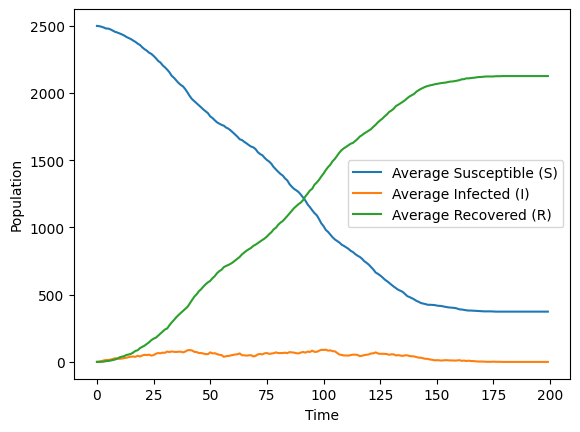

In [ ]:
# Function to initialize the grid
def initialize_grid(M, N, I0):
    grid = np.zeros((M, N), dtype=int)
    infected_cells = [(i, j) for i in range(M) for j in range(N) if random.random() < I0 / (M * N)]
    for (i, j) in infected_cells:
        grid[i, j] = 1  # Infected
    return grid

# Get the neighborhood of a cell
def get_neighborhood(grid, i, j, rad):
    M, N = grid.shape
    neighborhood = []
    for x in range(max(0, i-rad), min(M, i+rad+1)):
        for y in range(max(0, j-rad), min(N, j+rad+1)):
            neighborhood.append((x, y))
    return neighborhood

# Perform one time step of the simulation
def step(grid, rad, beta, gamma, t):
    M, N = grid.shape
    new_grid = grid.copy()

    for i in range(M):
        for j in range(N):
            if grid[i, j] == 0:  # Susceptible
                neighborhood = get_neighborhood(grid, i, j, rad)
                infected_neighbors = sum(1 for x, y in neighborhood if grid[x, y] == 1)
                if random.random() < beta * infected_neighbors:
                    new_grid[i, j] = 1  # Infection occurs

            elif grid[i, j] == 1:  # Infected
                if random.random() < gamma * (1 - np.exp(-t)):
                    new_grid[i, j] = 2  # Recovery occurs

    return new_grid

# Run a single simulation
def simulate_sir(M, N, T, I0, rad, beta, gamma):
    grid = initialize_grid(M, N, I0)

    S_counts = []
    I_counts = []
    R_counts = []

    for t in range(T):
        S_counts.append(np.sum(grid == 0))
        I_counts.append(np.sum(grid == 1))
        R_counts.append(np.sum(grid == 2))

        grid = step(grid, rad, beta, gamma, t)

    return S_counts, I_counts, R_counts, grid

# Function to run multiple simulations and compute averages
def run_multiple_simulations(M, N, T, I0, rad, beta, gamma, num_runs):
    S_total = np.zeros(T)
    I_total = np.zeros(T)
    R_total = np.zeros(T)

    for _ in range(num_runs):
        S_counts, I_counts, R_counts, _ = simulate_sir(M, N, T, I0, rad, beta, gamma)
        S_total += np.array(S_counts)
        I_total += np.array(I_counts)
        R_total += np.array(R_counts)

    # Compute averages
    S_avg = S_total / num_runs
    I_avg = I_total / num_runs
    R_avg = R_total / num_runs

    return S_avg, I_avg, R_avg

# Plot the average results of multiple simulations
def plot_average_sir(S_avg, I_avg, R_avg):
    t = range(len(S_avg))
    plt.plot(t, S_avg, label='Average Susceptible (S)')
    plt.plot(t, I_avg, label='Average Infected (I)')
    plt.plot(t, R_avg, label='Average Recovered (R)')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

# Parameters
M, N = 50, 50  # Grid size
T = 200  # Number of time steps
I0 = 2  # Initial infected cells
rad = 1  # Radius of interaction
beta = 0.1  # Infection probability
gamma = 0.25  # Recovery probability
num_runs = 1  # Number of simulation runs

# Run multiple simulations and plot the average results
S_avg, I_avg, R_avg = run_multiple_simulations(M, N, T, I0, rad, beta, gamma, num_runs)
plot_average_sir(S_avg, I_avg, R_avg)


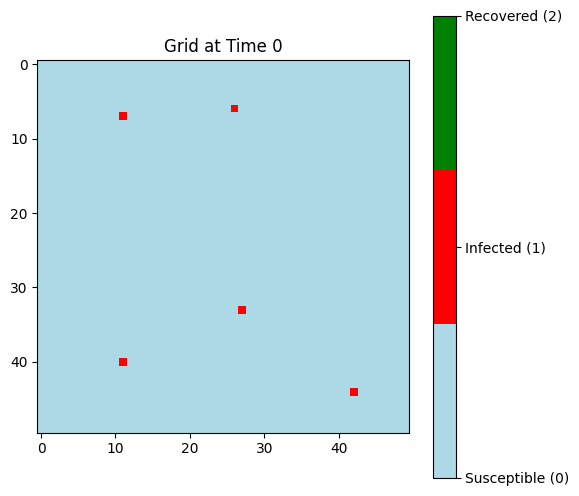

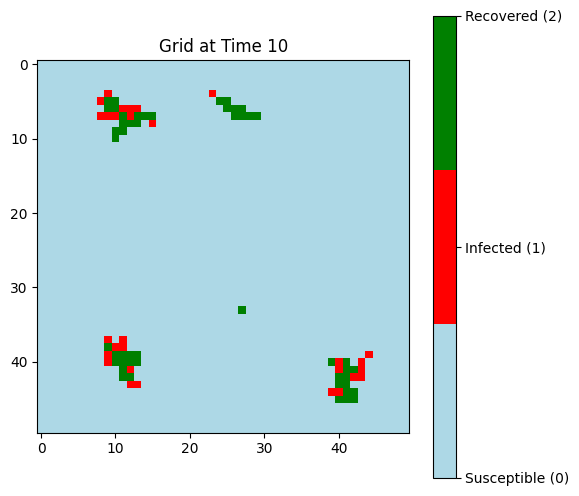

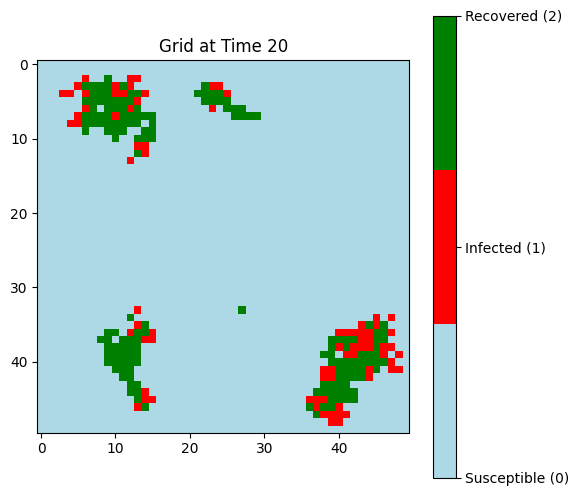

In [ ]:
# Function to capture grids at specific times
def simulate_and_capture(M, N, T, I0, rad, beta, gamma, capture_times):
    grid = initialize_grid(M, N, I0)
    grids_at_times = {}

    for t in range(T):
        if t in capture_times:
            grids_at_times[t] = grid.copy()
        grid = step(grid, rad, beta, gamma, t)

    return grids_at_times

def plot_grid(grid, time_step):
    # Define custom colors for 0 (Susceptible), 1 (Infected), 2 (Recovered)
    cmap = ListedColormap(['lightblue', 'red', 'green'])
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap=cmap, interpolation='nearest', vmin=0, vmax=2)  # vmin and vmax set value range
    plt.title(f'Grid at Time {time_step}')
    # Create custom colorbar
    colorbar = plt.colorbar(ticks=[0, 1, 2])
    colorbar.ax.set_yticklabels(['Susceptible (0)', 'Infected (1)', 'Recovered (2)'])

    plt.savefig(f'grid_time_{time_step}.png')
    plt.show()

# Parameters
capture_times = [0, 10, 20]  # Times to capture grids

# Run simulation and capture grids
grids_at_times = simulate_and_capture(M, N, T, I0, rad, beta, gamma, capture_times)

# Plot grids at specified times
for time_step in capture_times:
    plot_grid(grids_at_times[time_step], time_step)

La simulación parece mostrar una propagación de la infección más lenta de lo esperado, probablemente debido a una tasa de infección baja o una tasa de recuperación alta, en comparación con un modelo SIR clásico donde la población infectada alcanza un pico y luego disminuye a medida que se agota la población susceptible. Además, se muestra falta de suavizado en las curvas, por lo que es necesario obtener el promedio de diversas ejecuciones.

### Ejercicio 02

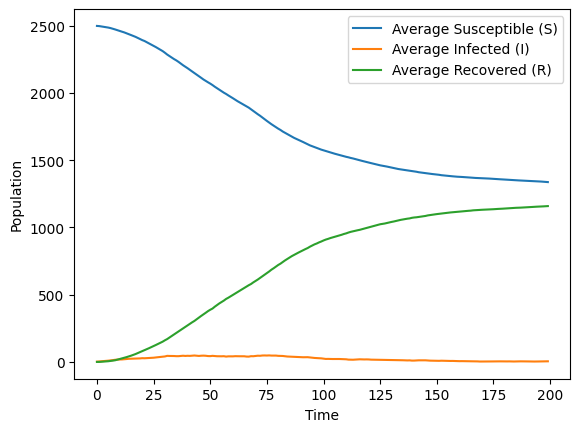

In [ ]:
# Parameters
M, N = 50, 50  # Grid size
T = 200  # Number of time steps
I0 = 2  # Initial infected cells
rad = 1  # Radius of interaction
beta = 0.1  # Infection probability
gamma = 0.25  # Recovery probability
num_runs = 10  # Number of simulation runs

# Run multiple simulations and plot the average results
S_avg, I_avg, R_avg = run_multiple_simulations(M, N, T, I0, rad, beta, gamma, num_runs)
plot_average_sir(S_avg, I_avg, R_avg)

Las curvas suavizadas demuestran un comportamiento más semejante al esperado por el modelo SIR teórico.

#### Mator tasa de recuperacion

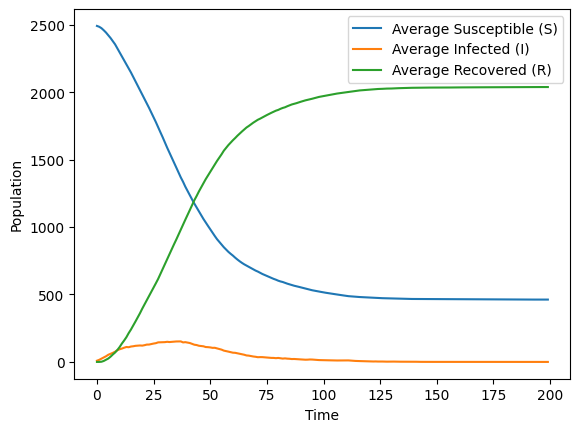

In [ ]:
# Parameters
M, N = 50, 50  # Grid size
T = 200  # Number of time steps
I0 = 10  # Initial infected cells
rad = 1  # Radius of interaction
beta = 0.1  # Infection probability
gamma = 0.25  # Recovery probability
num_runs = 10  # Number of simulation runs

# Run multiple simulations and plot the average results
S_avg, I_avg, R_avg = run_multiple_simulations(M, N, T, I0, rad, beta, gamma, num_runs)
plot_average_sir(S_avg, I_avg, R_avg)


La curva de infecciones no muestra un pico alto y la curva de susceptibilidad comienza a decrecer más lentamente con el paso del tiempo.

#### Mayor tasa de infección

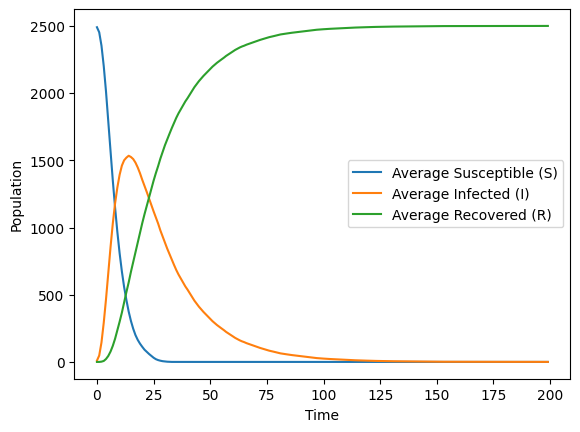

In [ ]:
# Parameters
M, N = 50, 50  # Grid size
T = 200  # Number of time steps
I0 = 10  # Initial infected cells
rad = 1  # Radius of interaction
beta = 0.5  # Infection probability
gamma = 0.05  # Recovery probability
num_runs = 10  # Number of simulation runs

# Run multiple simulations and plot the average results
S_avg, I_avg, R_avg = run_multiple_simulations(M, N, T, I0, rad, beta, gamma, num_runs)
plot_average_sir(S_avg, I_avg, R_avg)


La curva de infecciones presenta un pico bastante alto, así como también la curva de susceptibibles decrece abruptamente durante el crecimiento de las infecciones. Las recuperaciones crecen, a la vez que el resto de curvas decrece.

### Misma tasa

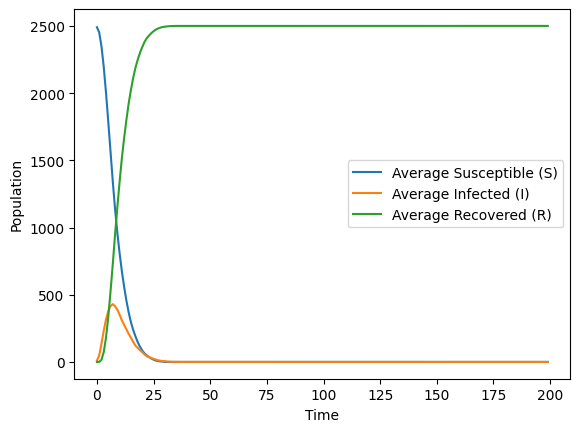

In [ ]:
# Parameters
M, N = 50, 50  # Grid size
T = 200  # Number of time steps
I0 = 10  # Initial infected cells
rad = 1  # Radius of interaction
beta = 0.5  # Infection probability
gamma = 0.5  # Recovery probability
num_runs = 10  # Number of simulation runs

# Run multiple simulations and plot the average results
S_avg, I_avg, R_avg = run_multiple_simulations(M, N, T, I0, rad, beta, gamma, num_runs)
plot_average_sir(S_avg, I_avg, R_avg)


El pico de las infecciones no es tan amplio. Sin embargo, la curva de susceptibles continua decreciendo posterior al pico de infección.

### Ejercicio 03

In [ ]:
# Parámetros globales
M, N = 50, 50  # Tamaño del grid
T = 200  # Número de pasos de tiempo
rad = 1  # Radio de interacción
beta = 0.1  # Probabilidad de infección
gamma = 0.25  # Probabilidad de recuperación
num_runs = 10  # Número de simulaciones


In [ ]:
# Lista de posiciones infectadas iniciales
infected_positions = [(10, 10), (15, 15), (20, 20)]


In [ ]:
# Función para inicializar la cuadrícula con posiciones infectadas predefinidas
def initialize_grid_with_positions(M, N, infected_positions):
    grid = np.zeros((M, N), dtype=int)
    for (i, j) in infected_positions:
        grid[i, j] = 1  # Infectar las posiciones en la lista
    return grid


In [ ]:
# Función para ejecutar una simulación con posiciones infectadas predefinidas
def simulate_sir_with_positions(M, N, T, infected_positions, rad, beta, gamma):
    grid = initialize_grid_with_positions(M, N, infected_positions)

    S_counts = []
    I_counts = []
    R_counts = []

    grids_over_time = np.zeros((T + 1, M, N), dtype=int)
    grids_over_time[0] = grid  # Guardar el estado inicial

    for t in range(1, T + 1):
        S_counts.append(np.sum(grid == 0))
        I_counts.append(np.sum(grid == 1))
        R_counts.append(np.sum(grid == 2))
        grid = step(grid, rad, beta, gamma, t)
        grids_over_time[t] = grid  # Guardar la cuadrícula en cada paso de tiempo

    return S_counts, I_counts, R_counts, grids_over_time

# Función para ejecutar múltiples simulaciones con posiciones infectadas predefinidas y calcular los promedios
def run_multiple_simulations_with_positions(M, N, T, infected_positions, rad, beta, gamma, num_runs):
    grids_total = np.zeros((num_runs, T + 1, M, N), dtype=int)

    for run in range(num_runs):
        _, _, _, grids_over_time = simulate_sir_with_positions(M, N, T, infected_positions, rad, beta, gamma)
        grids_total[run] = grids_over_time

    # Promediar los grids a lo largo de todas las ejecuciones
    grids_average = np.mean(grids_total, axis=0)

    return grids_average


# Función para animar la evolución promedio de la cuadrícula en el tiempo
# Función para animar la evolución promedio de la cuadrícula en el tiempo
def animate_simulation(grids_average, T):
    fig, ax = plt.subplots()

    def update(t):
        ax.clear()
        cmap = ListedColormap(['lightblue', 'red', 'green'])
        ax.imshow(grids_average[t], cmap=cmap, interpolation='nearest', vmin=0, vmax=2)
        ax.set_title(f'Time = {t}')
        plt.axis('off')

    anim = FuncAnimation(fig, update, frames=range(T + 1), repeat=False)

    # Mostrar la animación en lugar de guardarla
    plt.show()

    # Guardar la animación si todo se visualiza correctamente
    anim.save('average_simulation.mp4', writer='ffmpeg')
    plt.close()


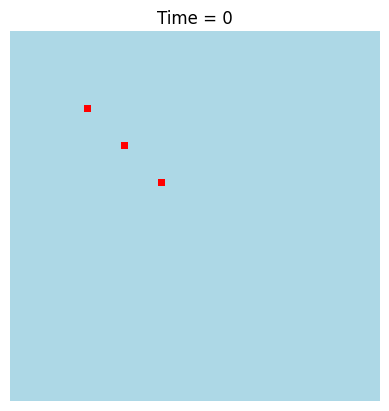

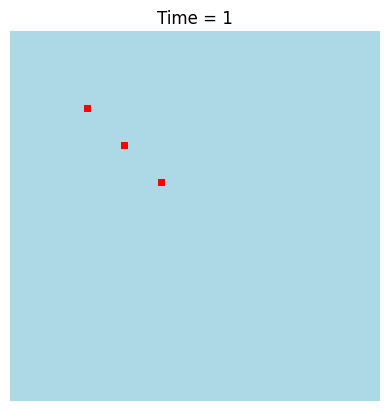

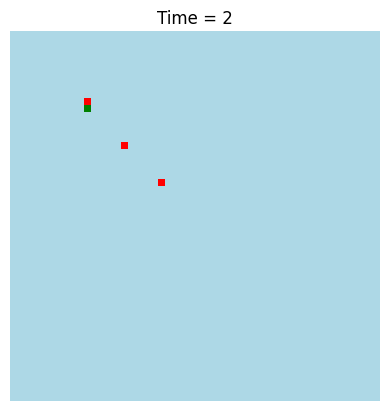

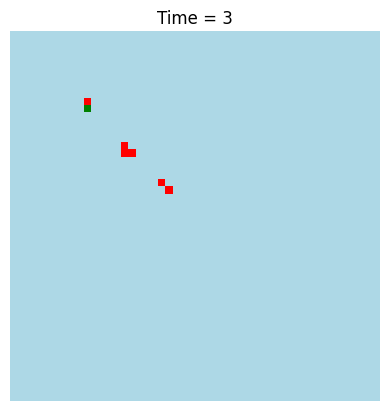

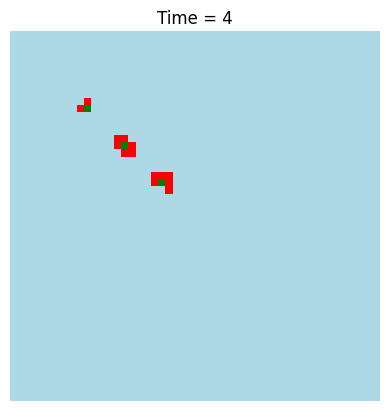

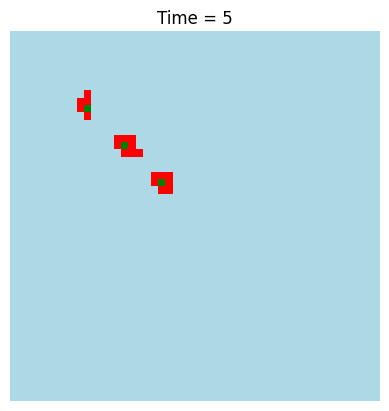

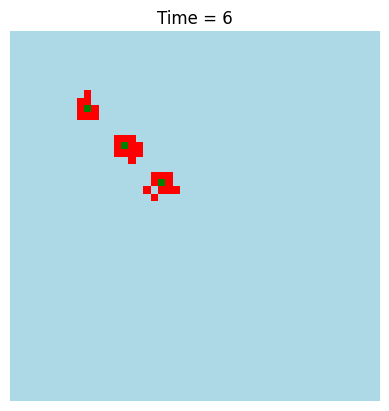

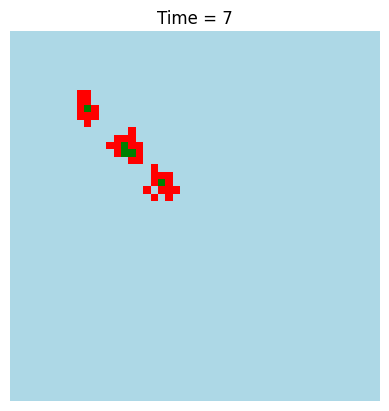

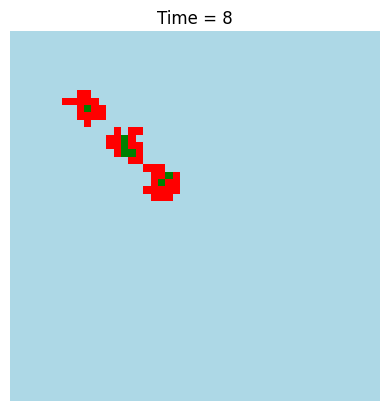

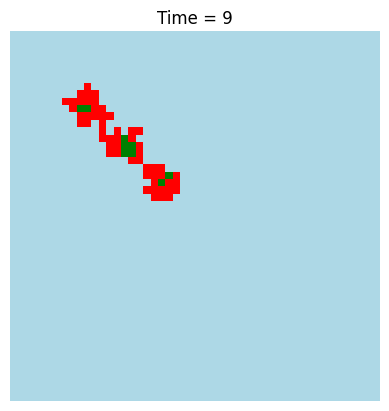

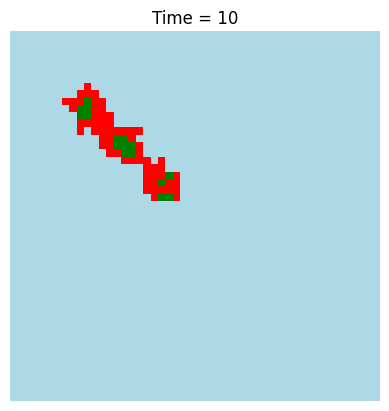

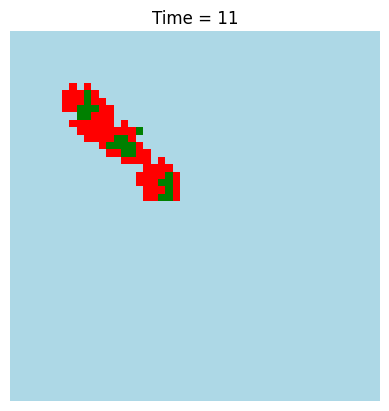

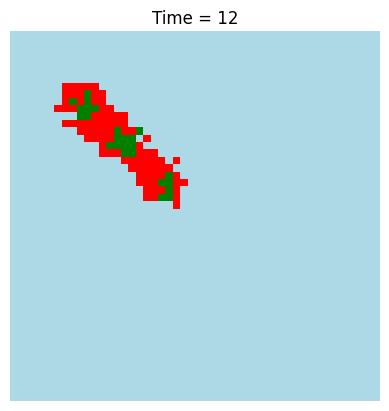

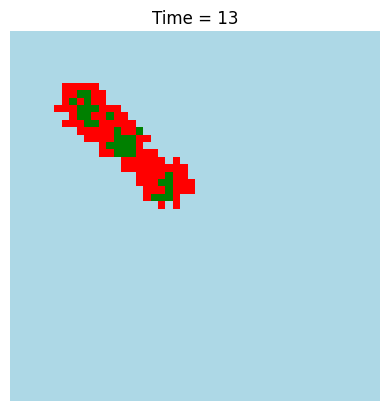

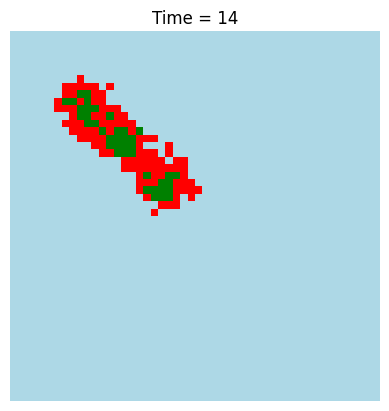

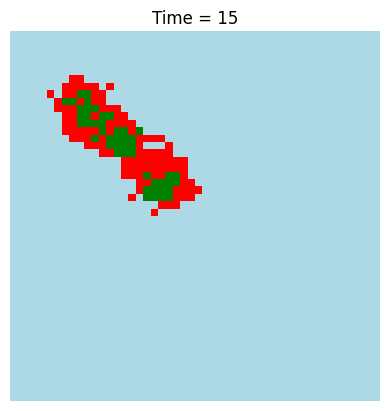

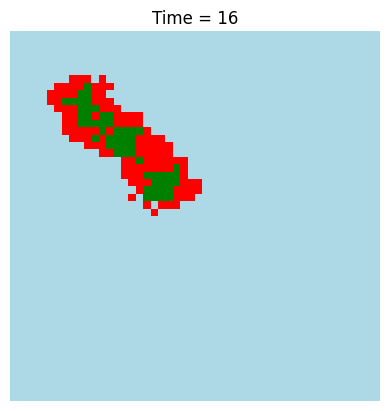

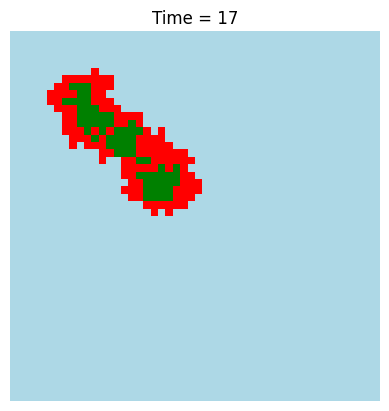

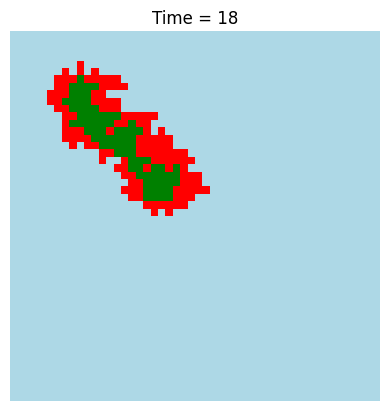

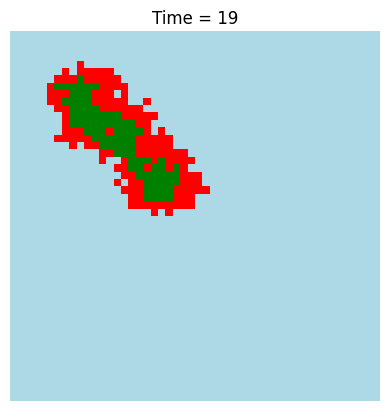

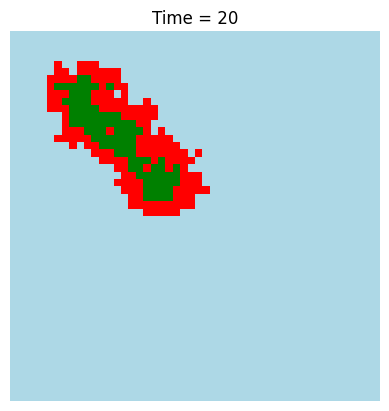

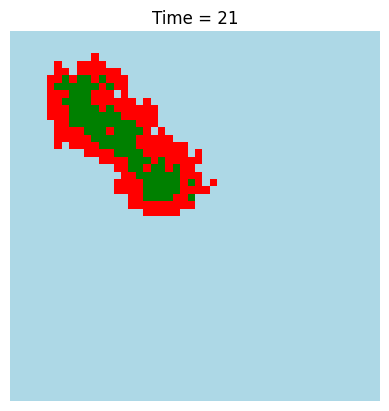

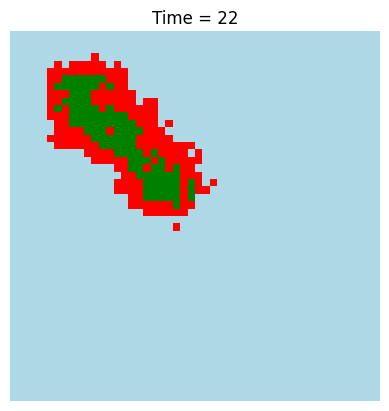

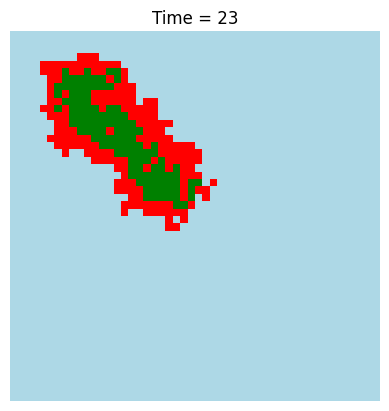

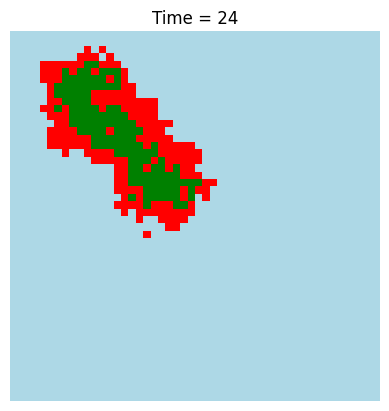

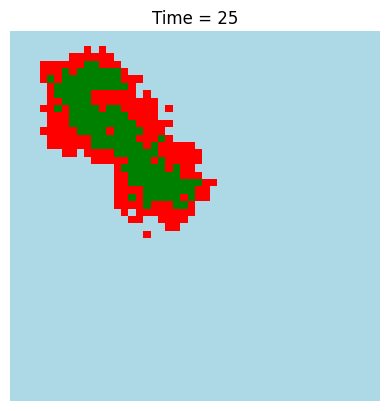

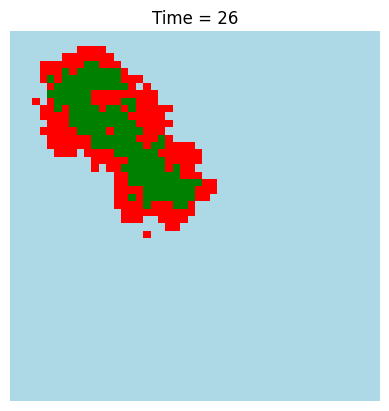

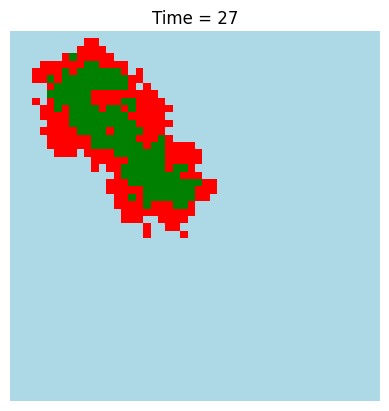

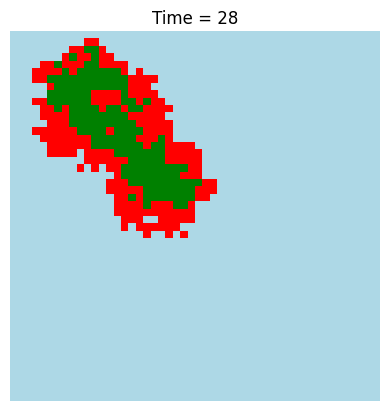

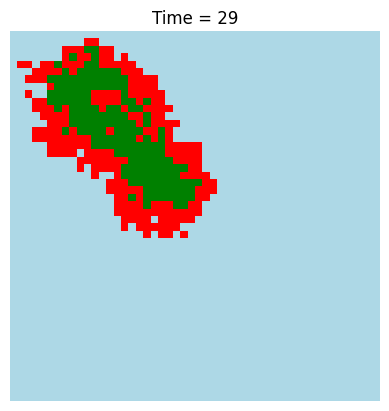

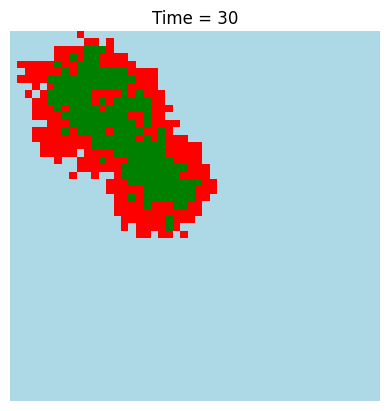

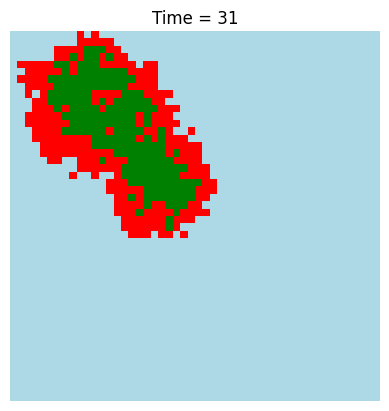

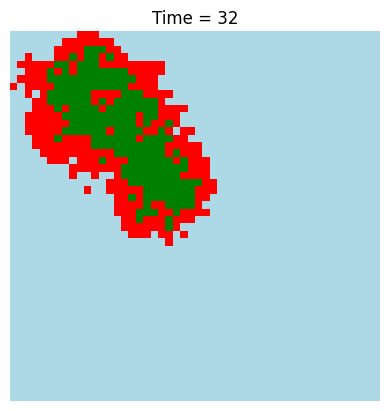

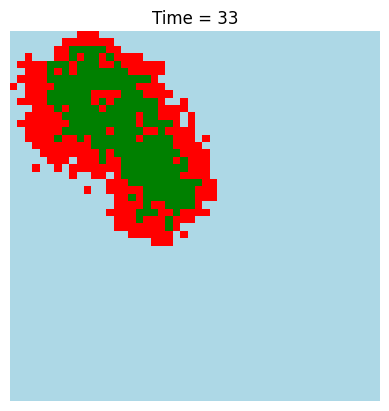

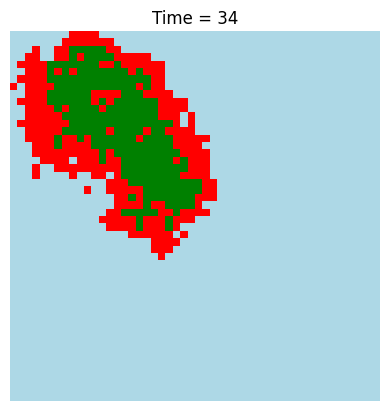

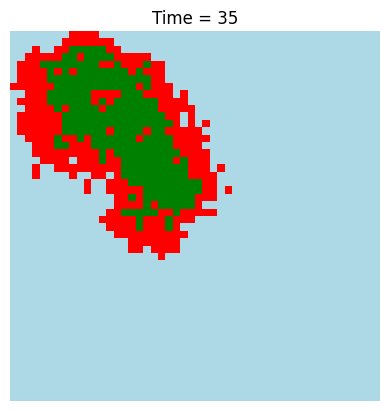

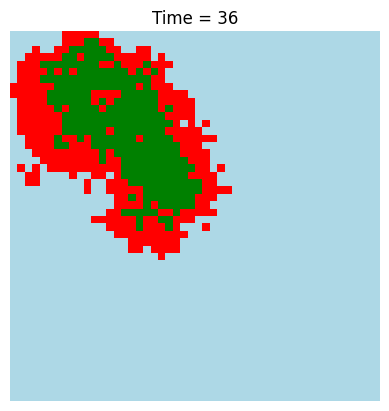

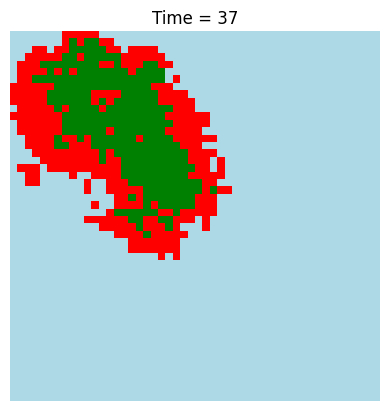

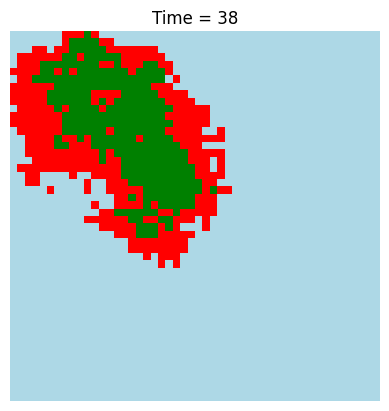

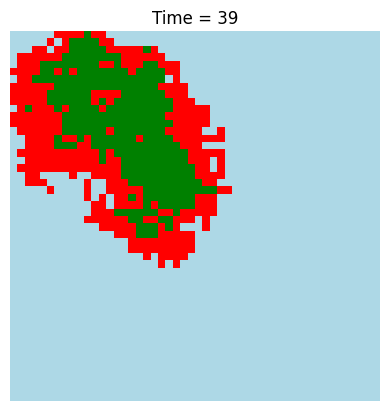

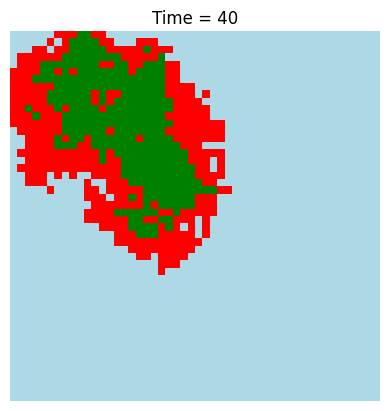

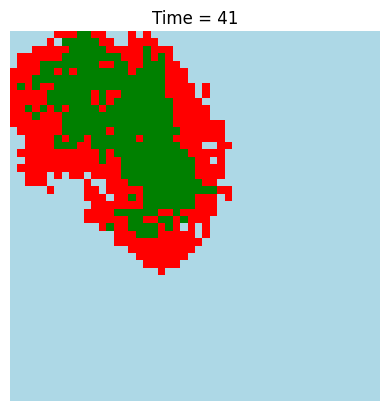

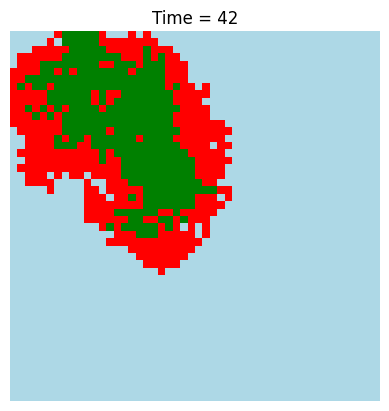

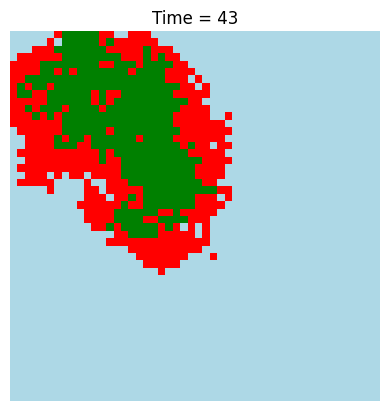

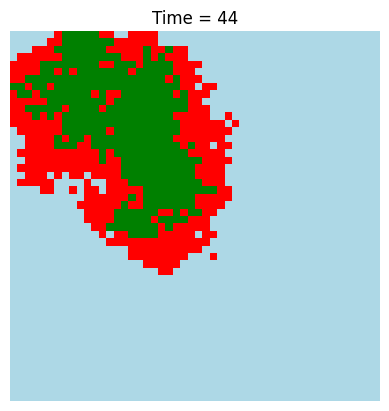

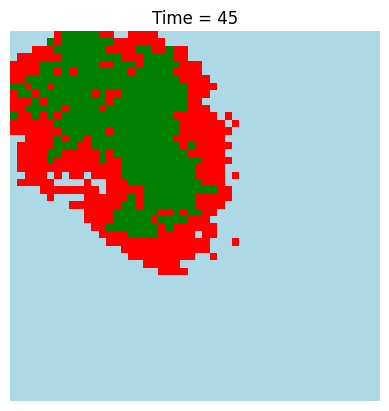

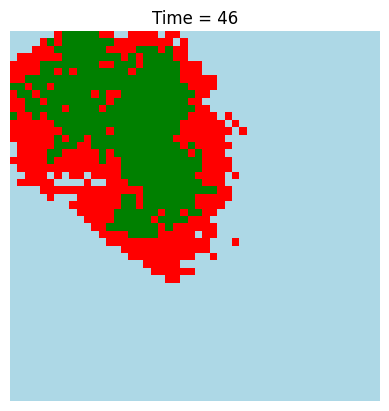

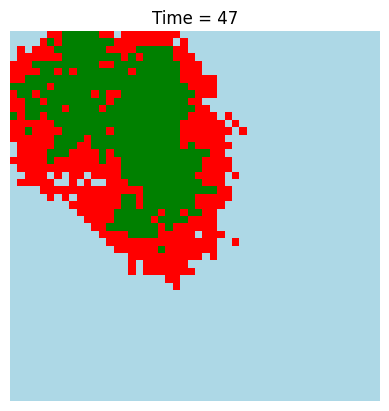

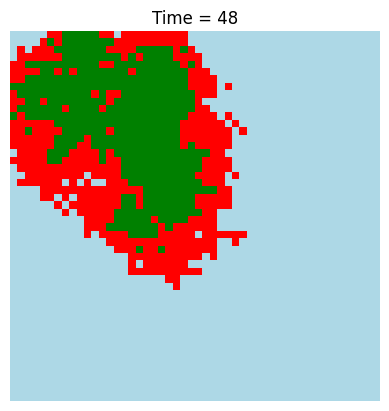

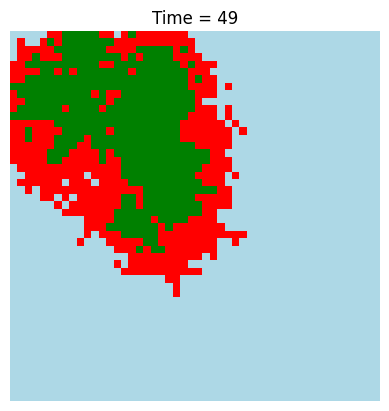

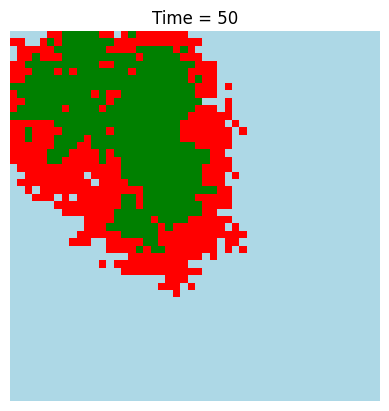

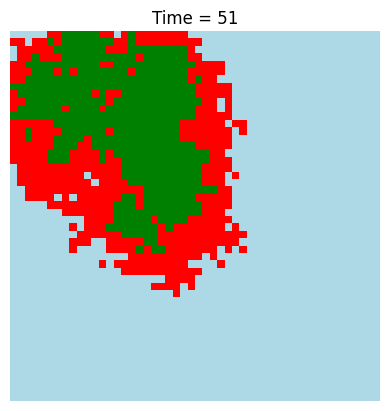

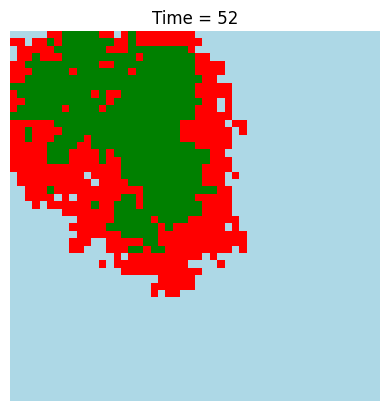

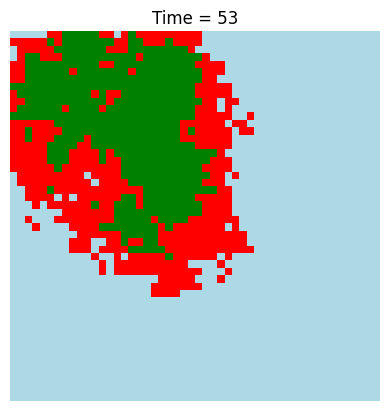

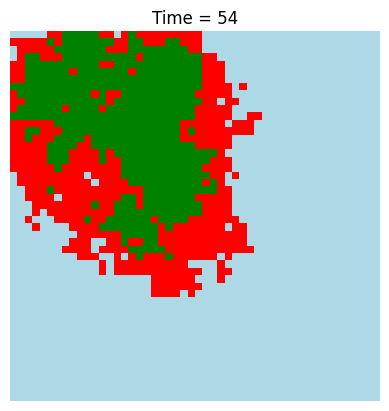

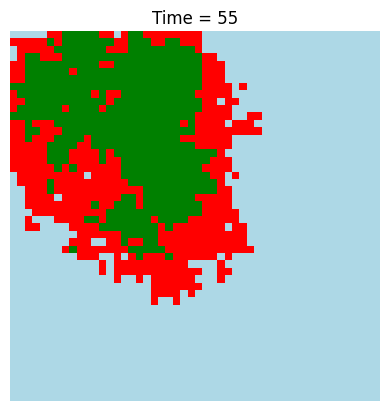

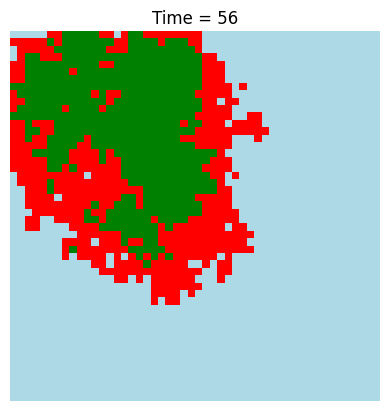

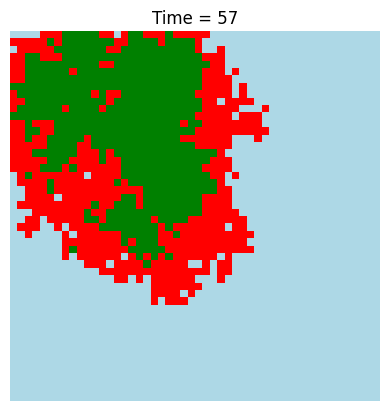

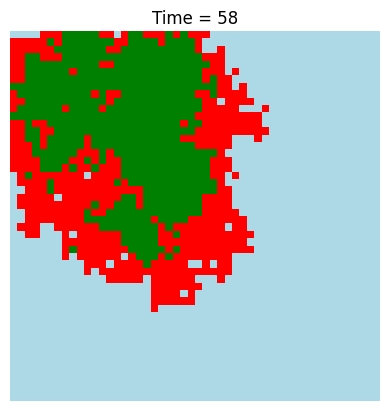

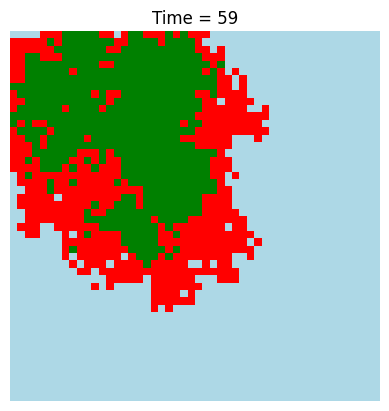

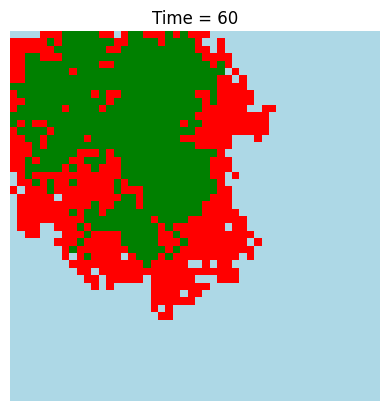

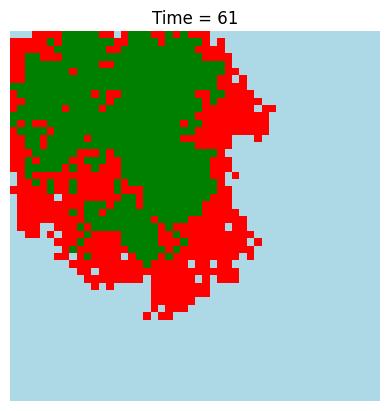

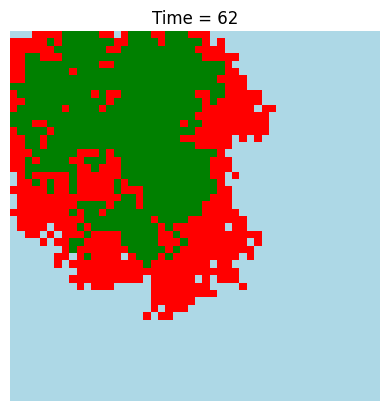

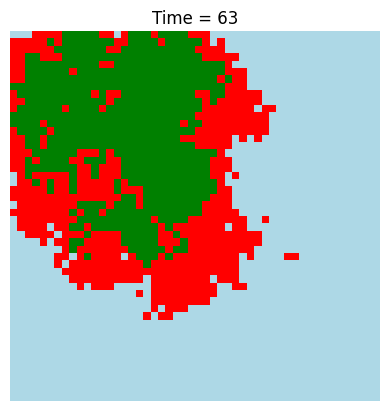

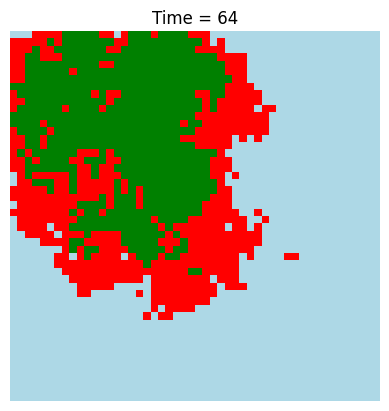

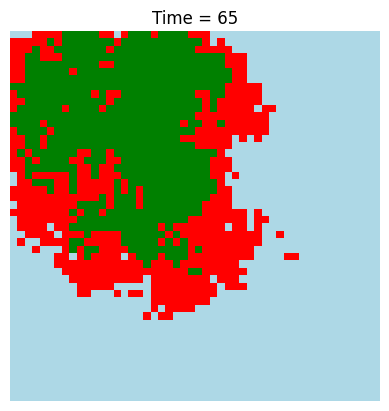

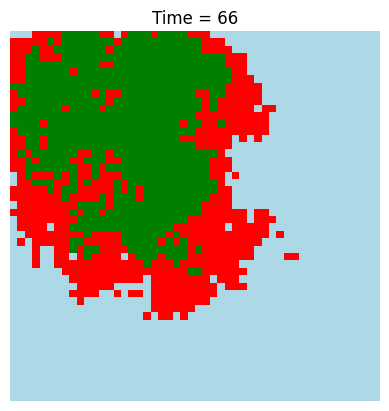

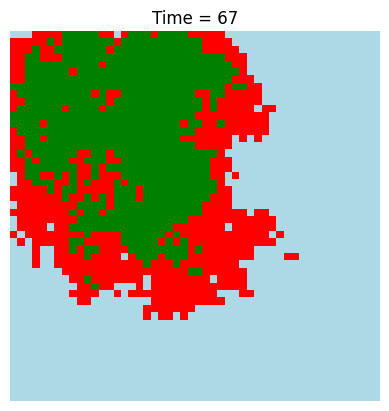

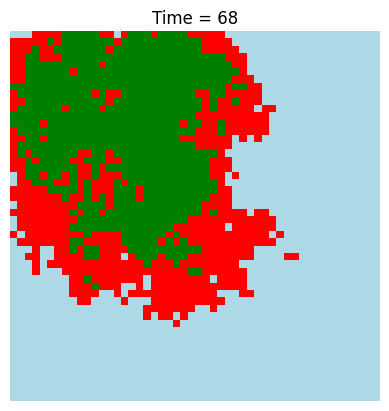

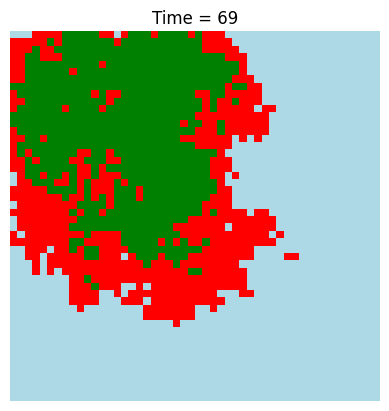

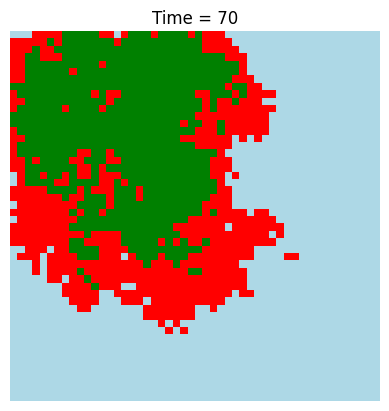

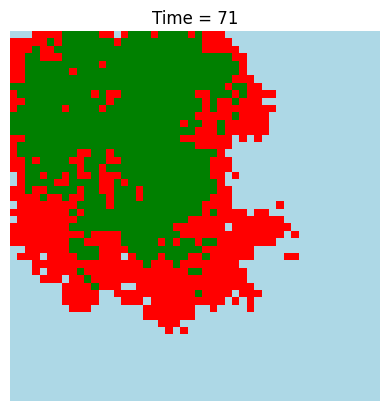

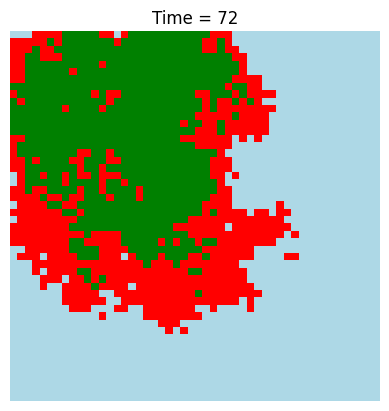

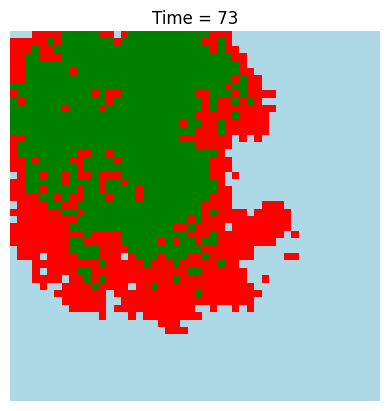

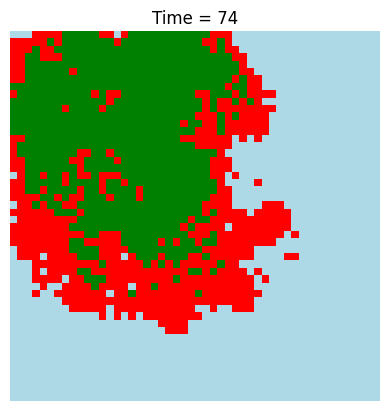

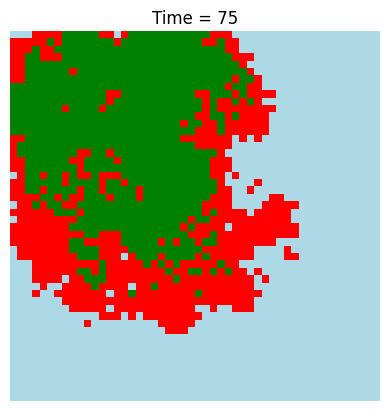

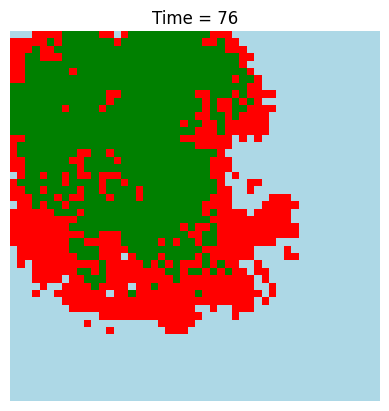

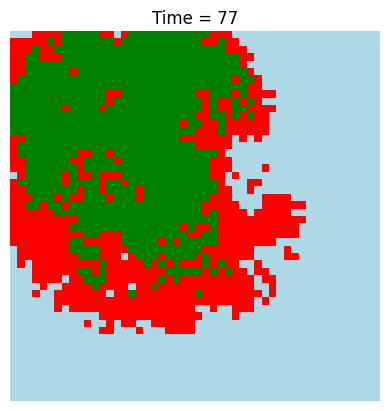

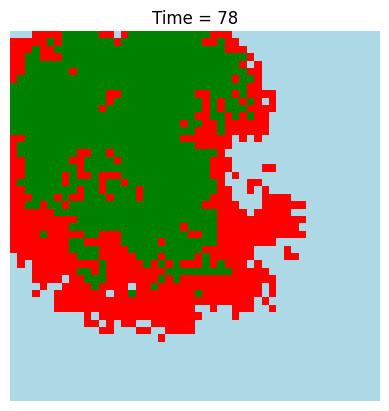

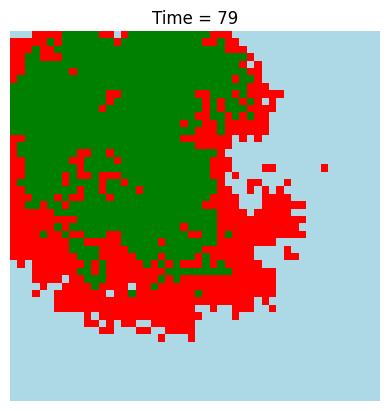

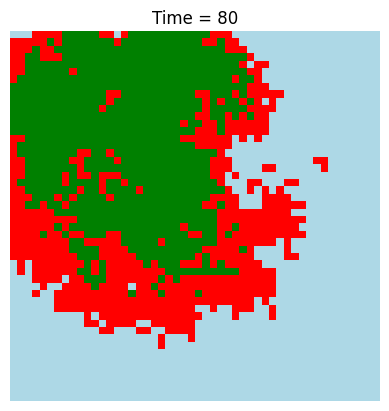

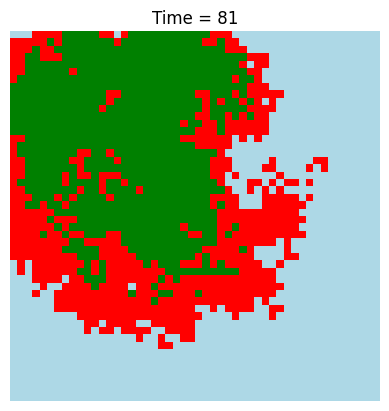

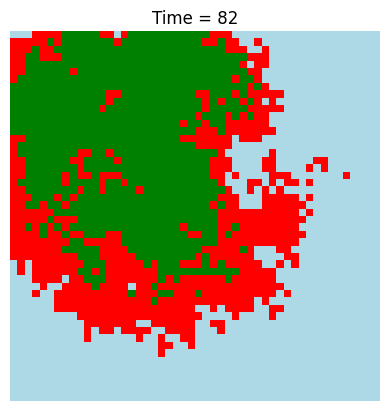

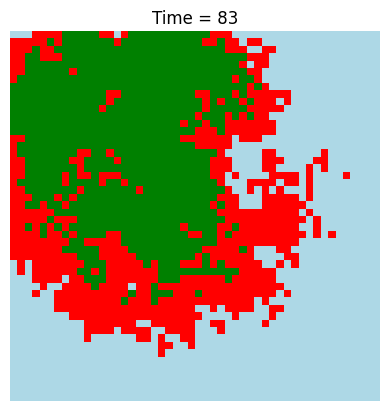

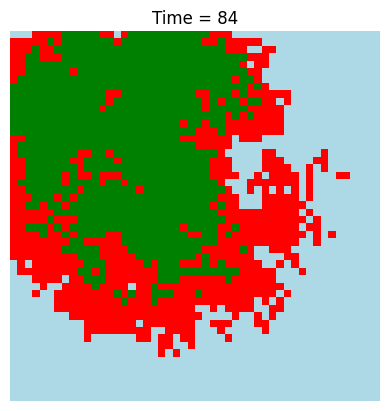

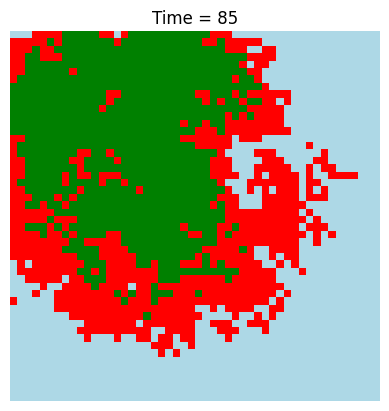

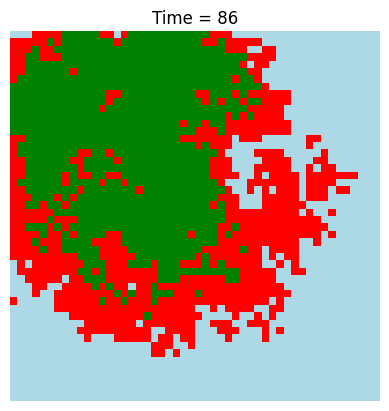

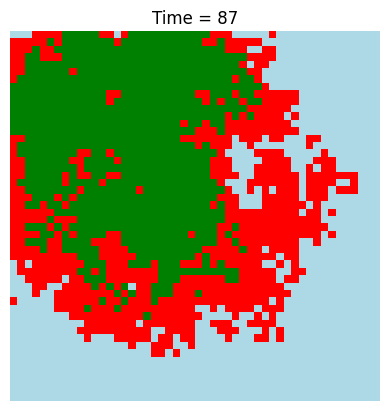

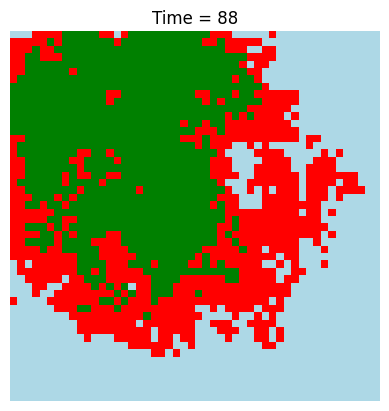

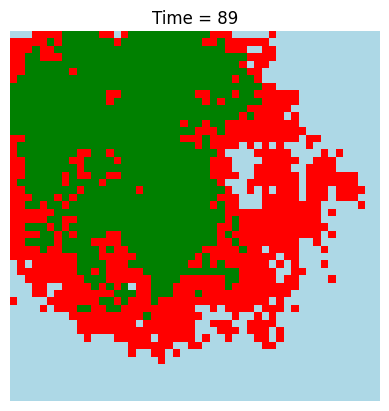

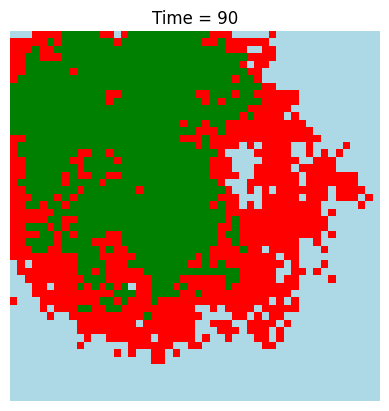

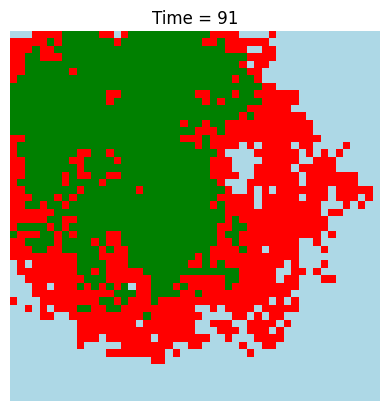

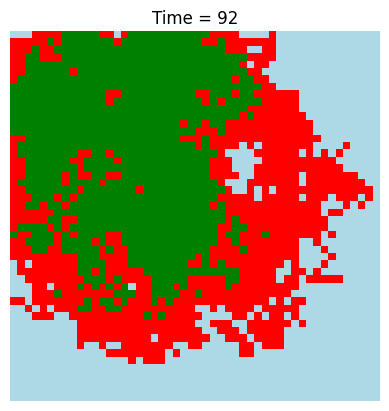

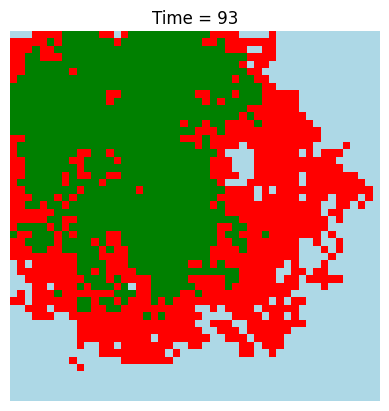

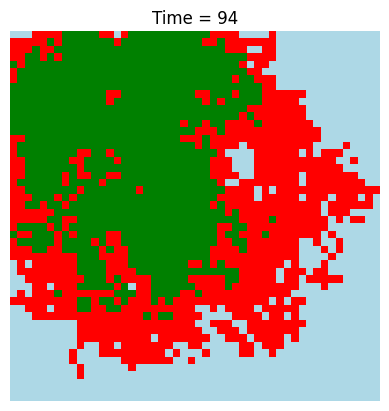

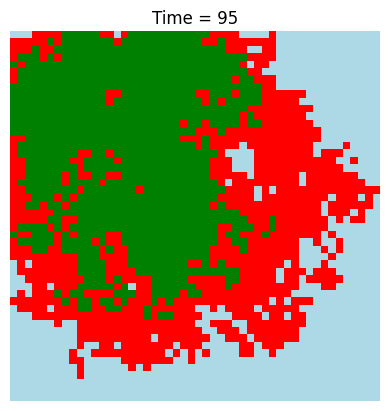

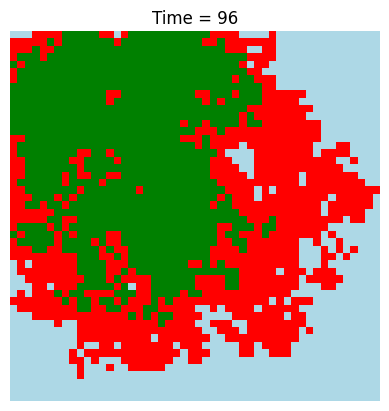

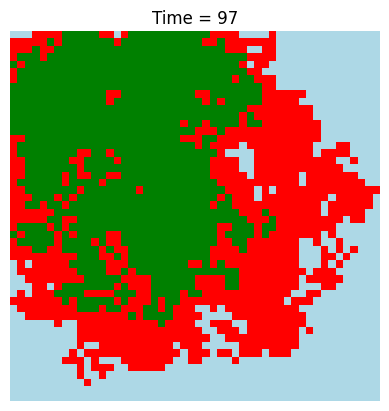

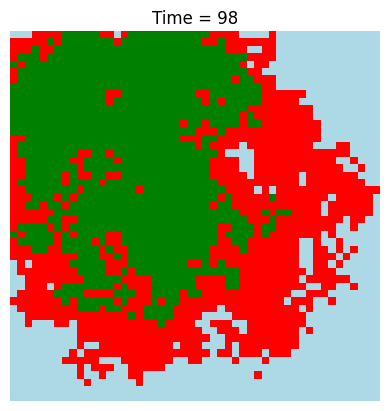

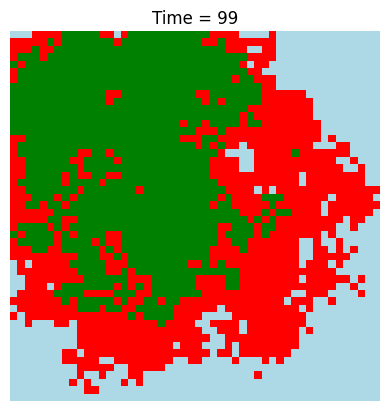

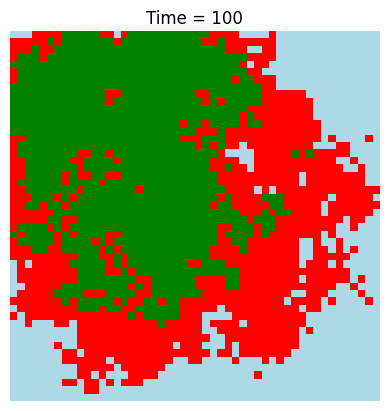

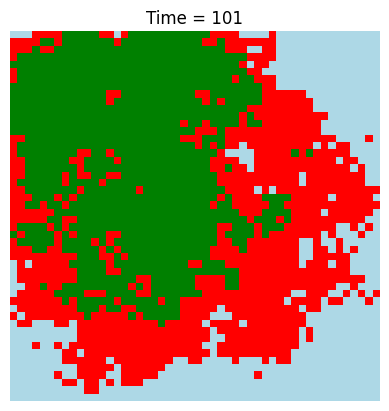

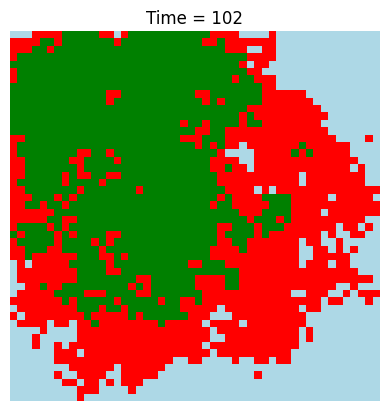

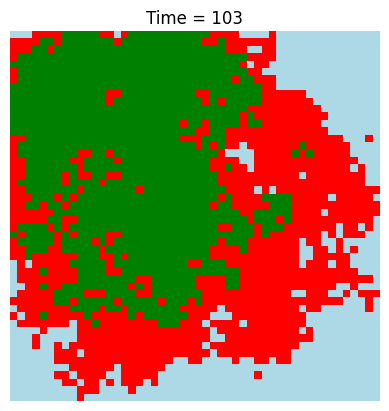

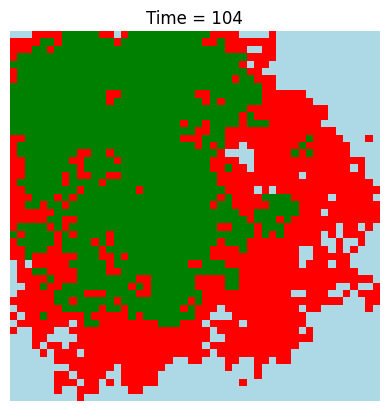

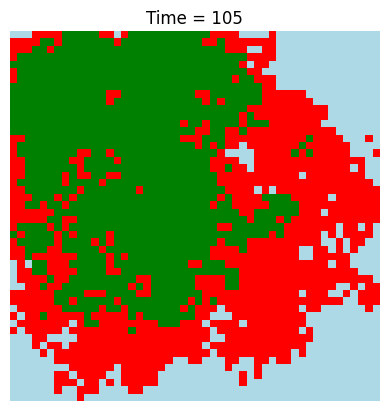

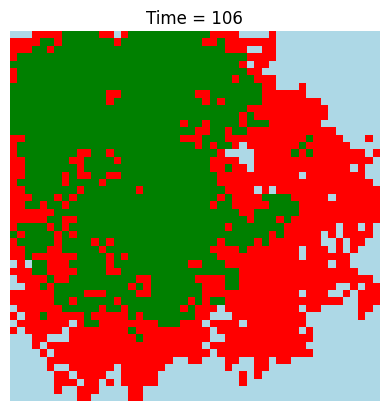

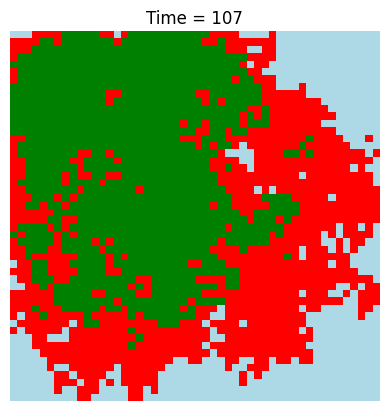

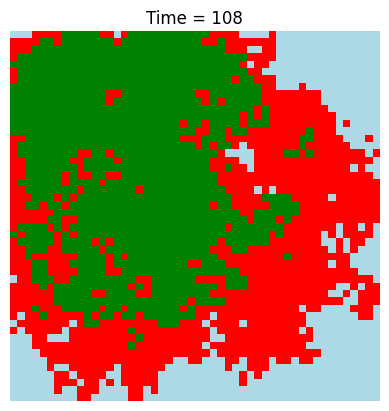

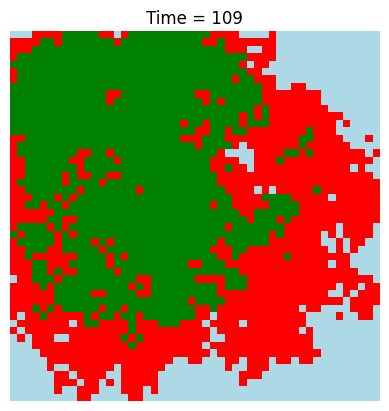

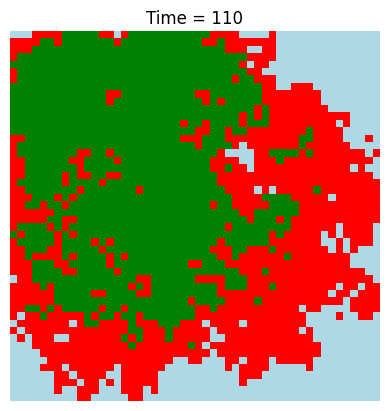

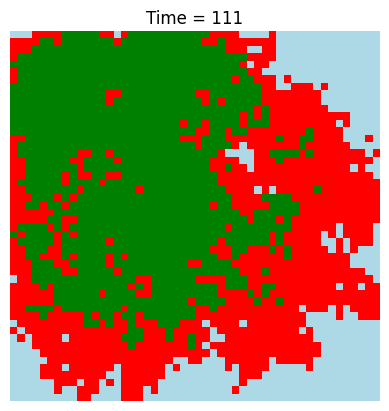

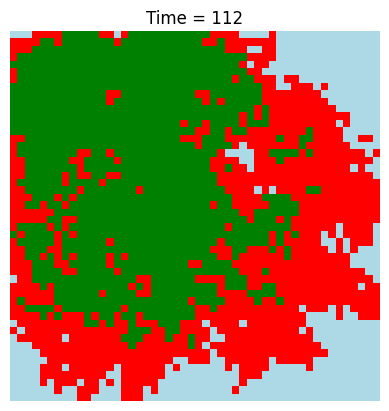

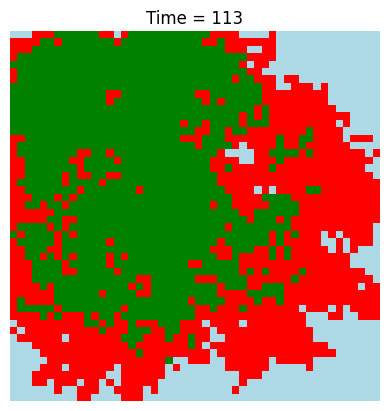

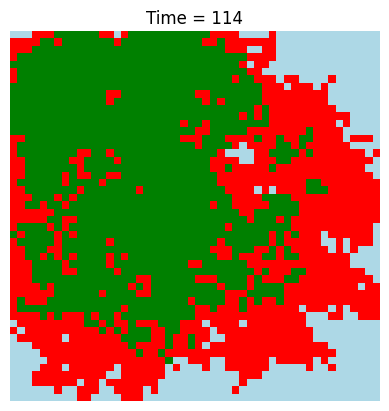

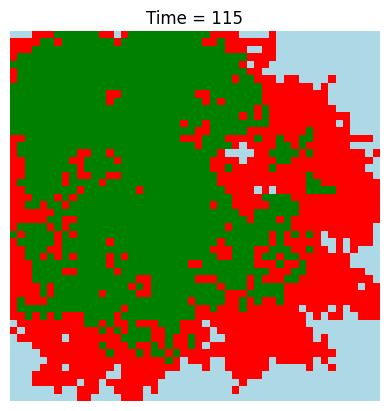

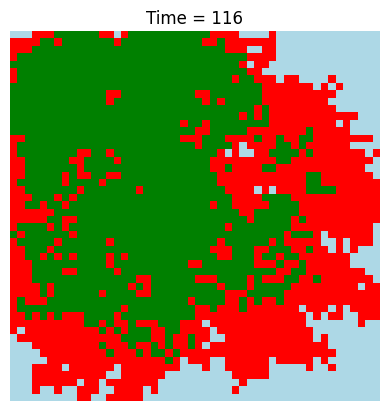

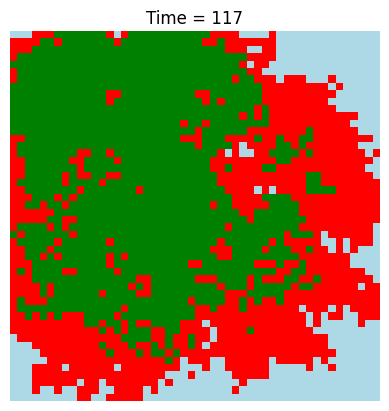

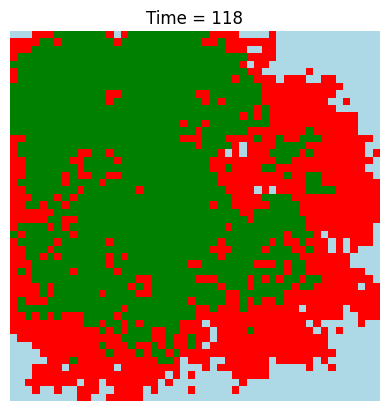

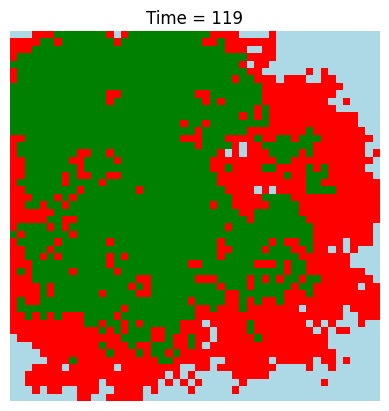

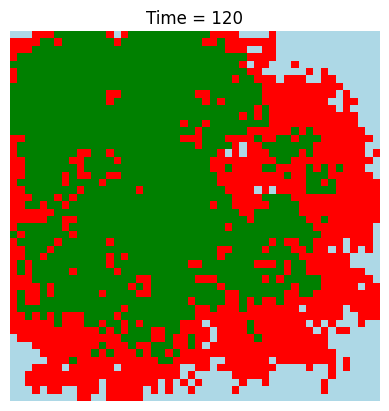

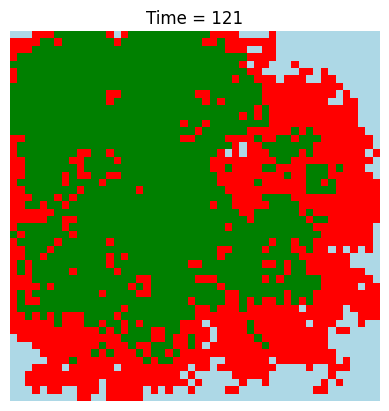

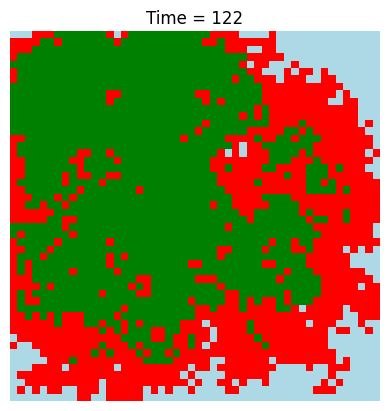

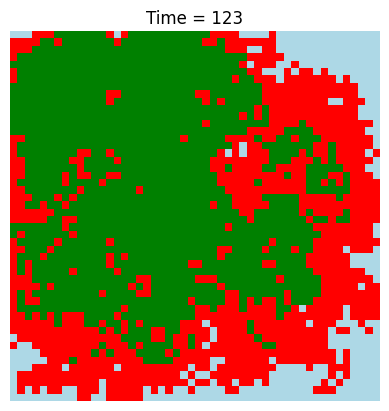

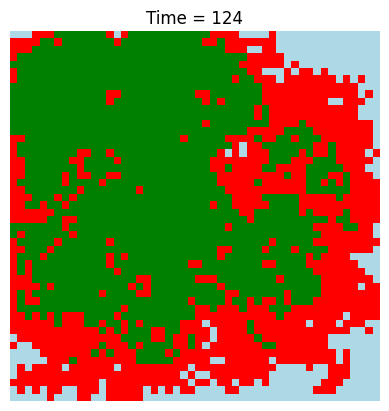

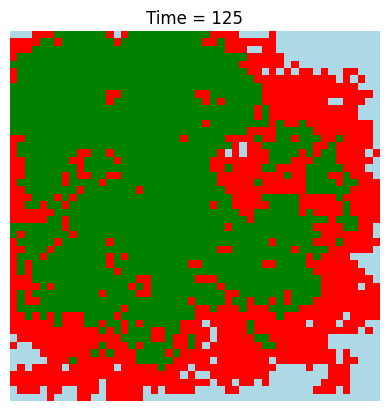

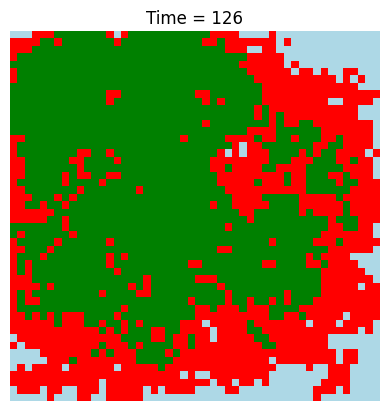

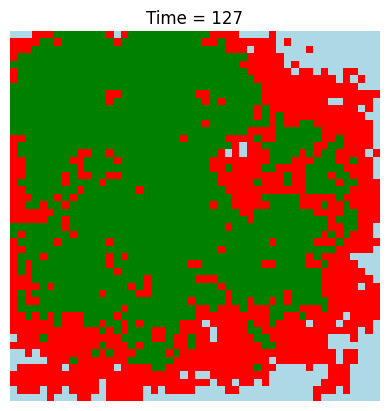

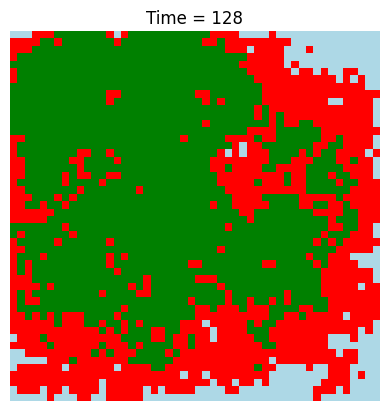

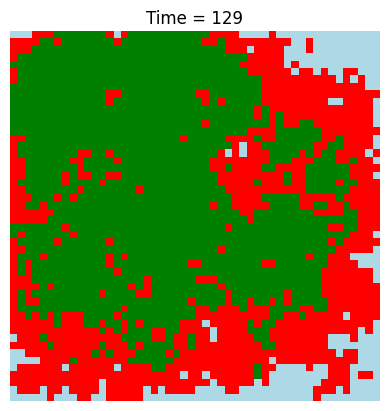

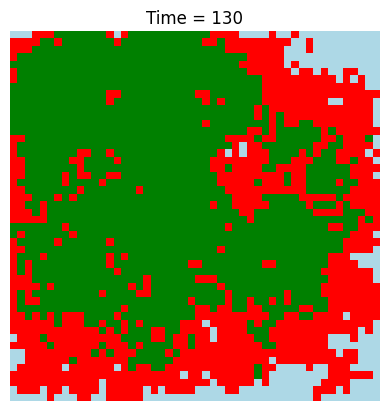

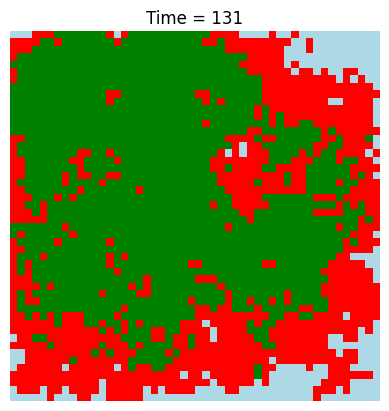

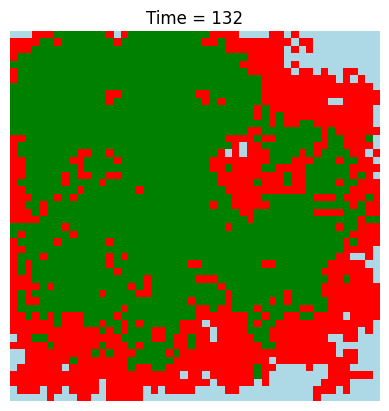

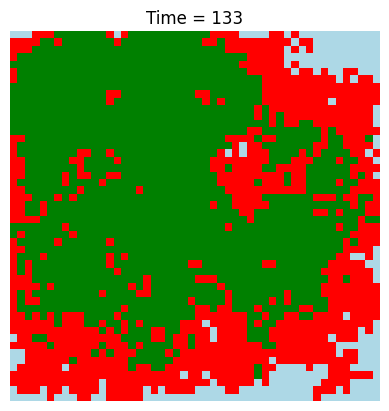

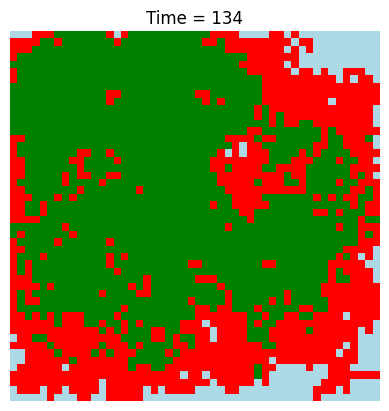

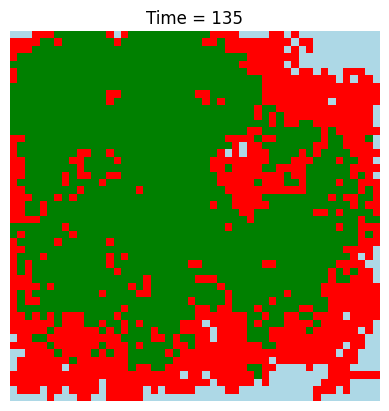

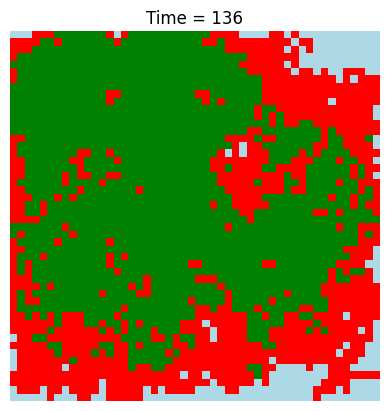

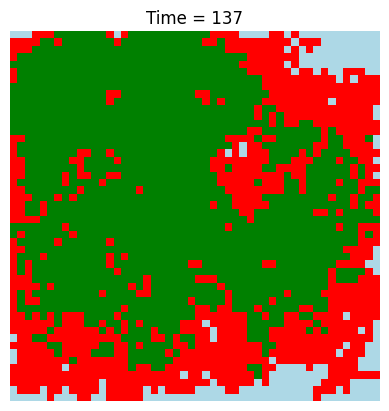

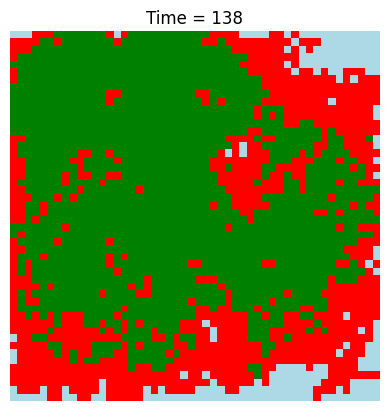

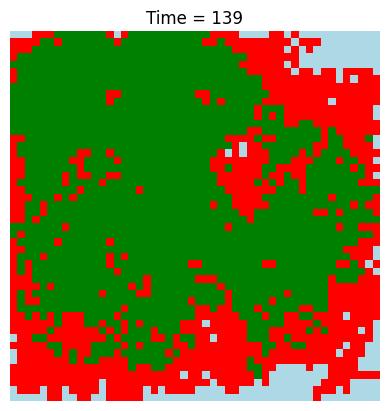

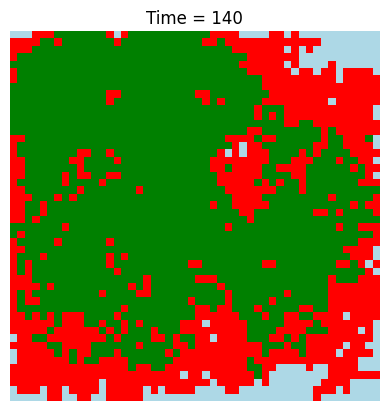

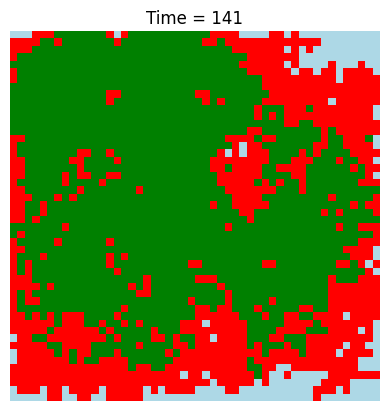

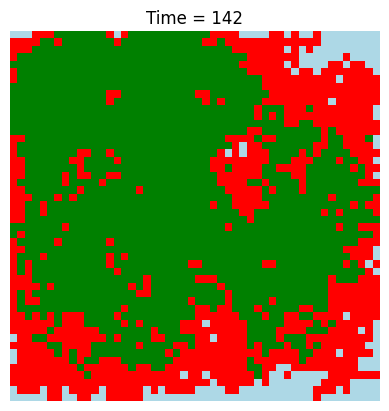

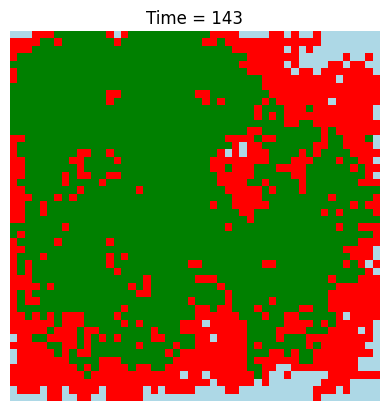

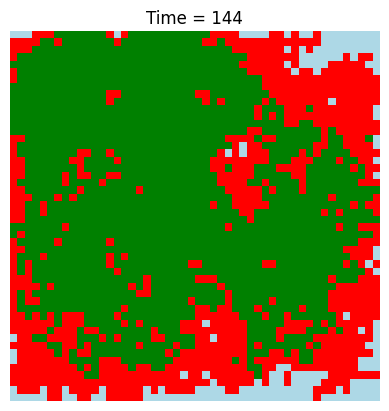

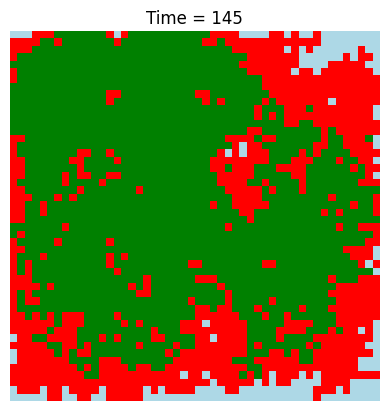

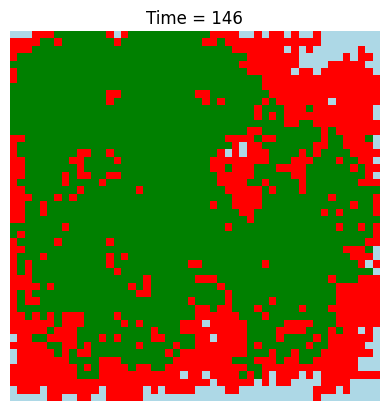

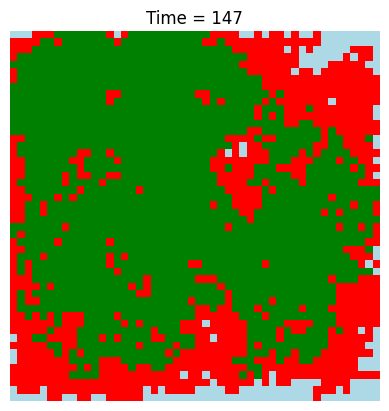

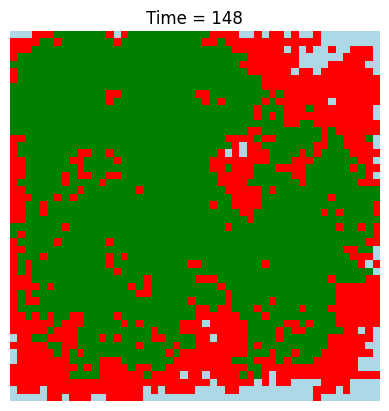

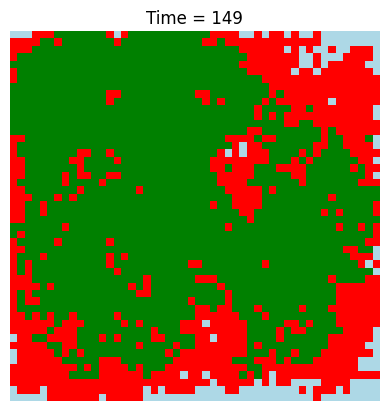

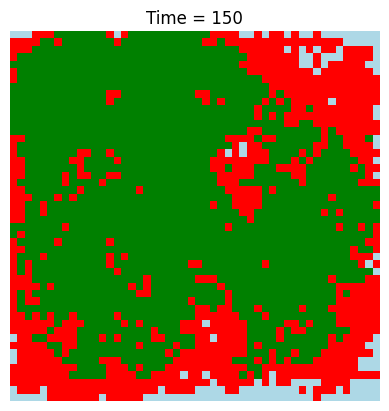

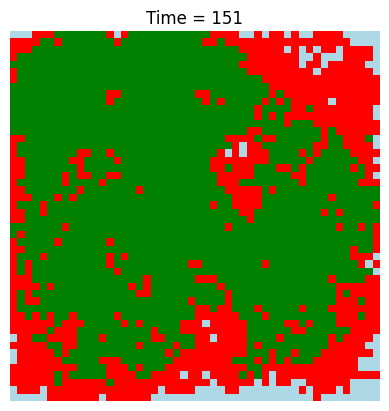

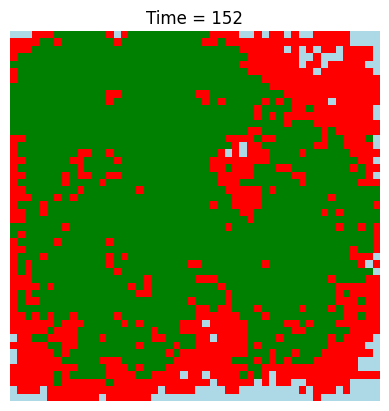

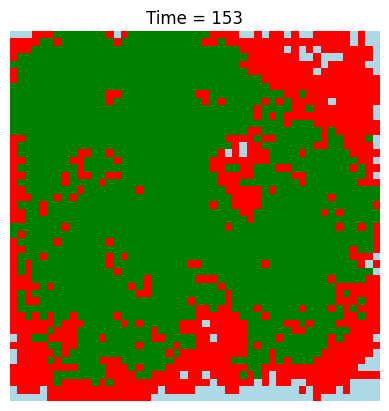

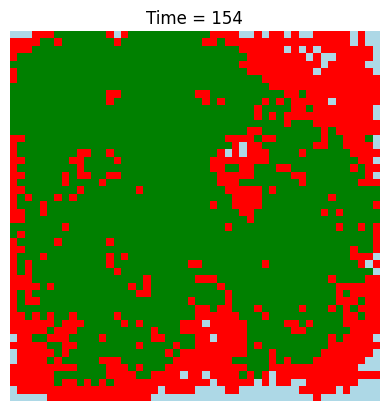

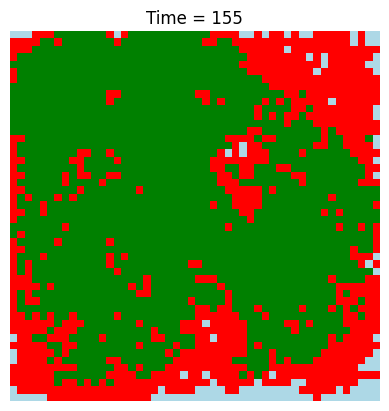

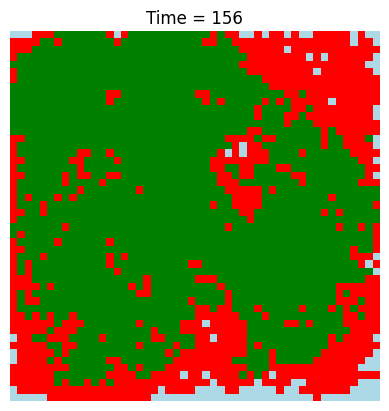

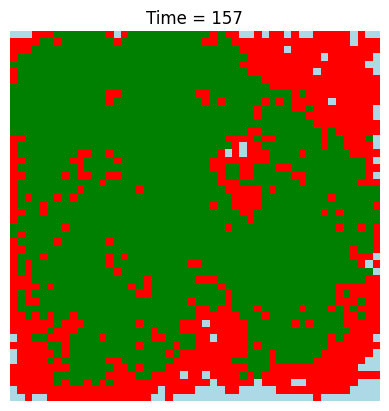

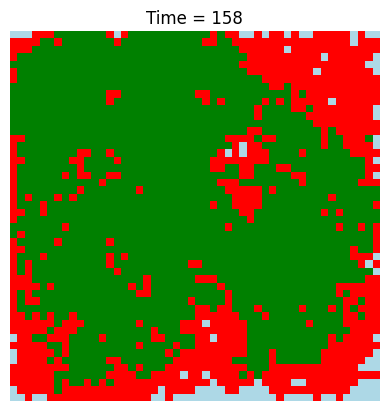

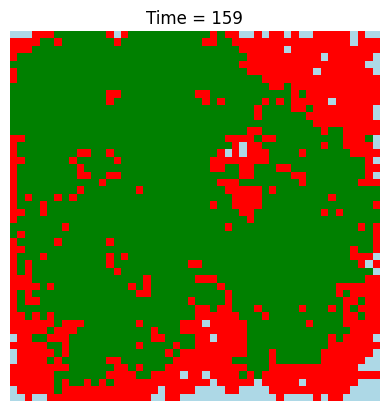

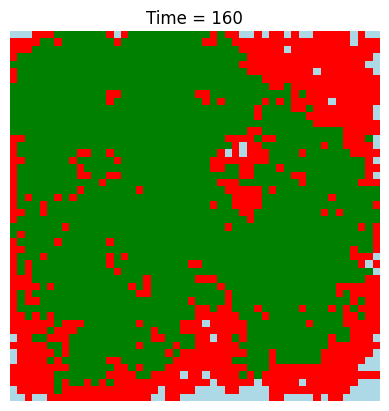

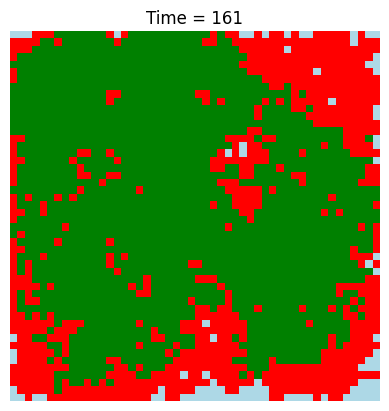

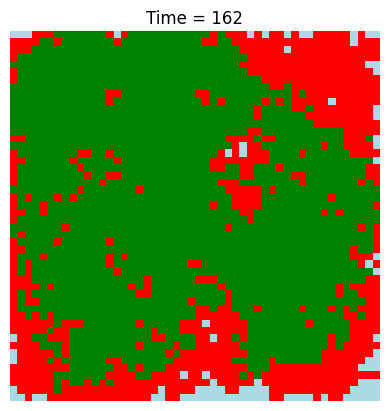

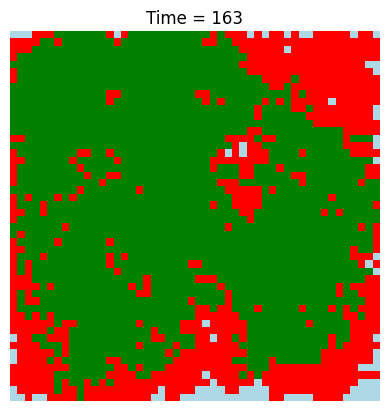

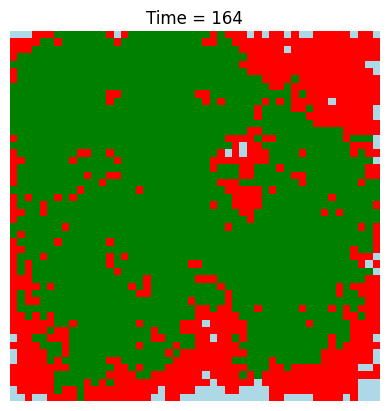

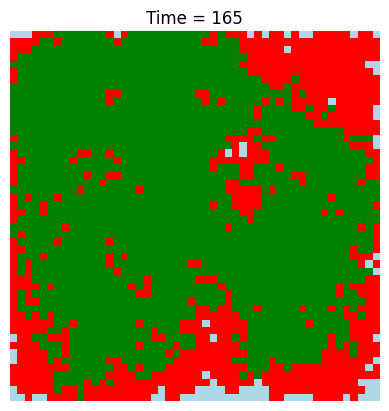

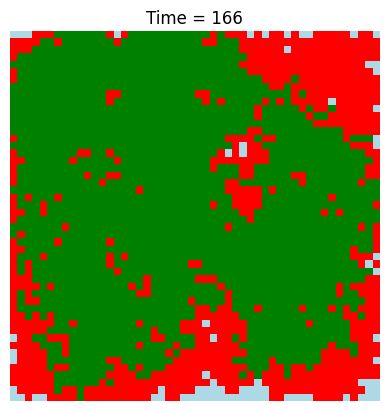

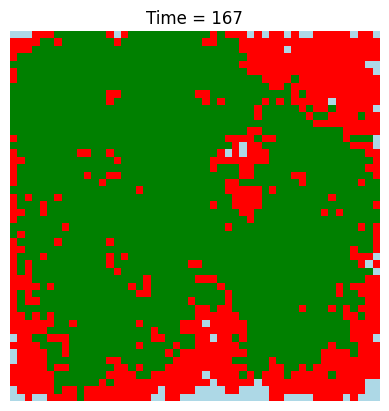

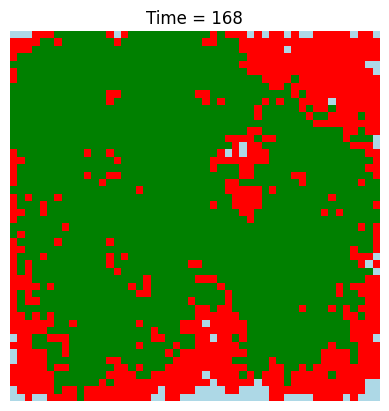

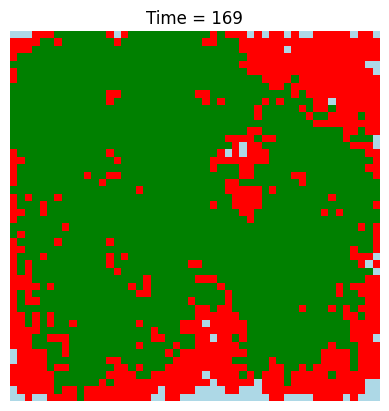

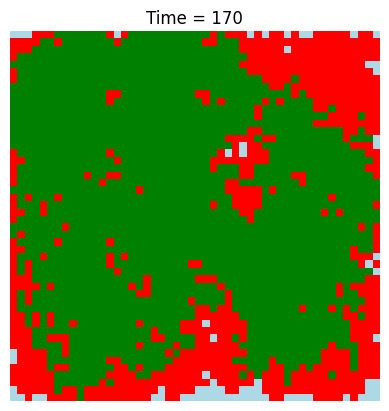

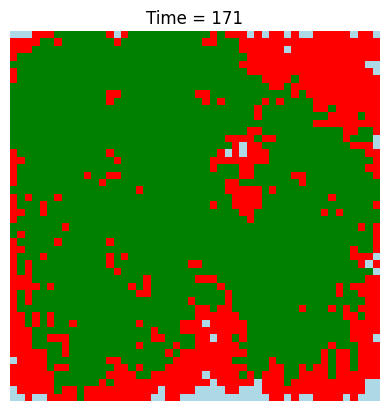

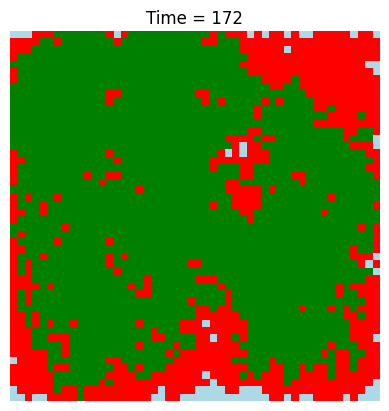

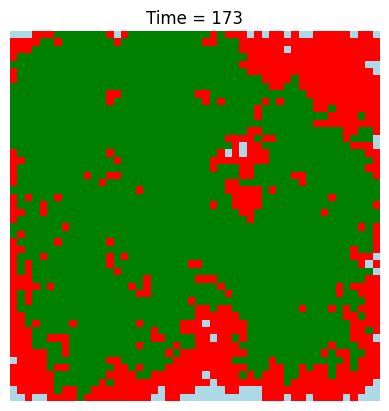

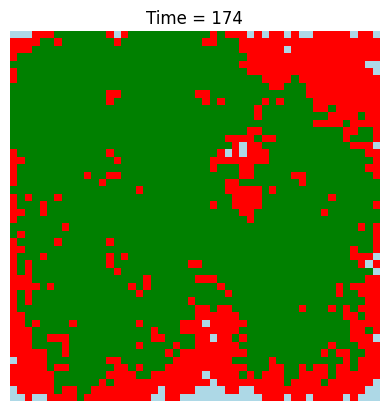

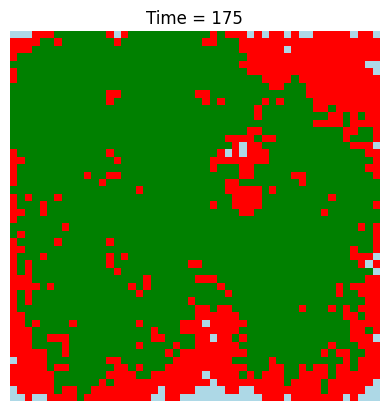

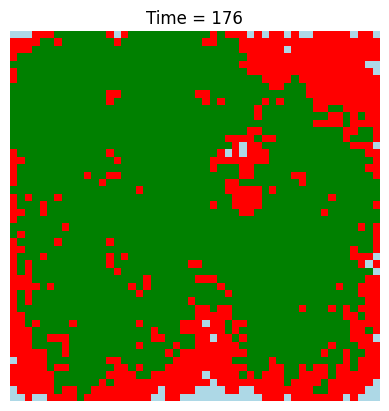

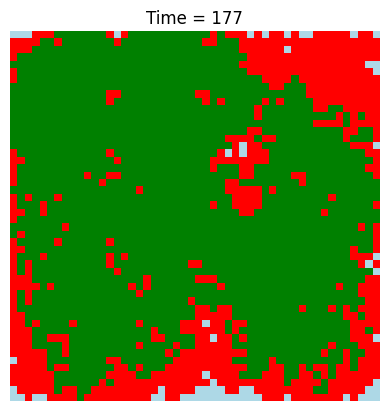

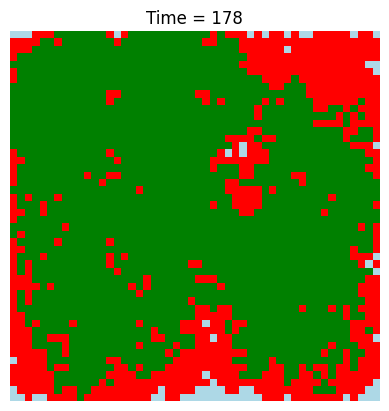

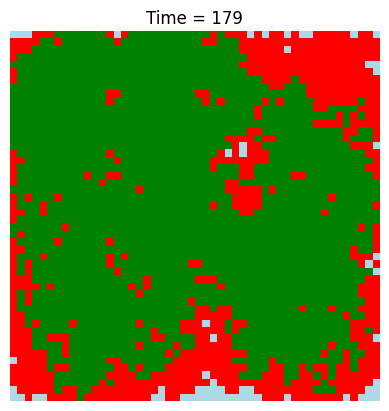

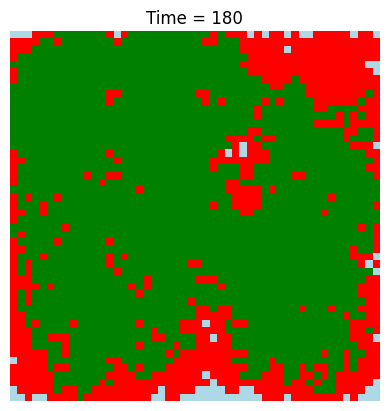

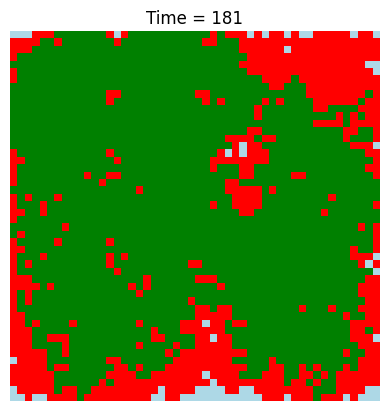

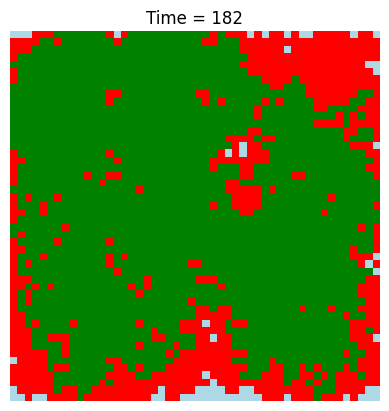

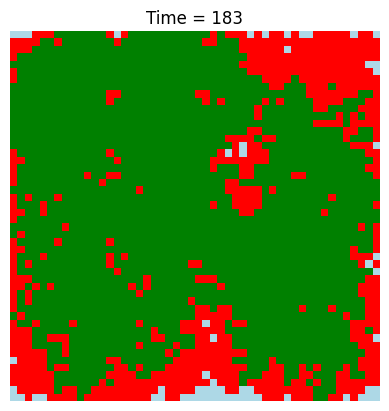

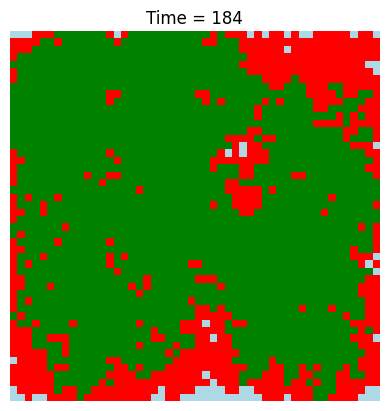

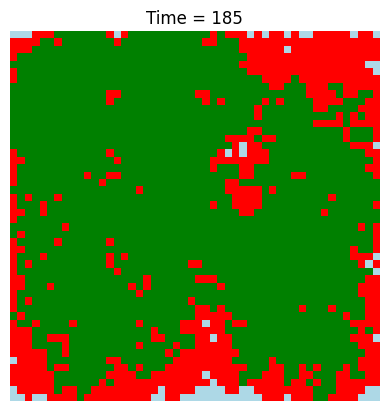

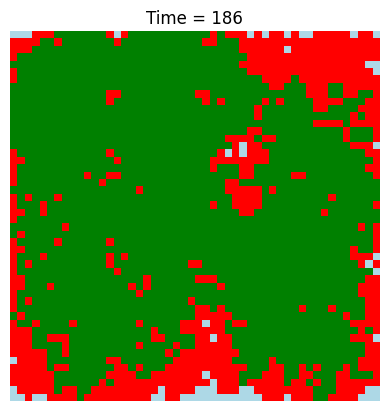

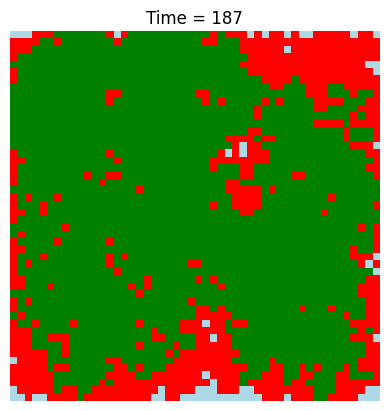

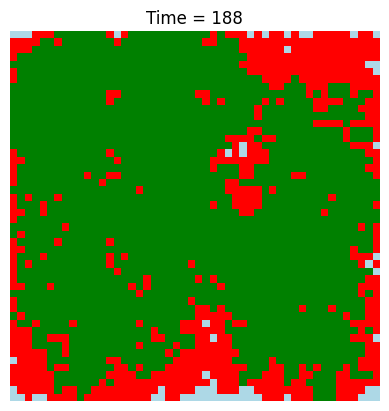

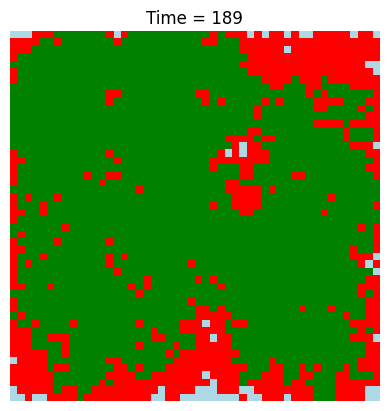

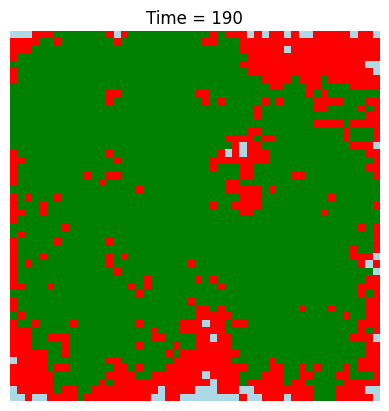

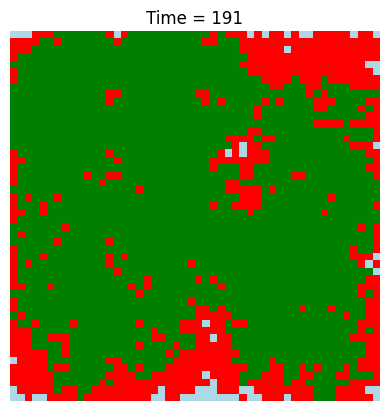

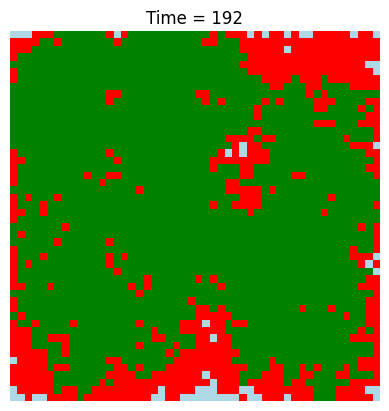

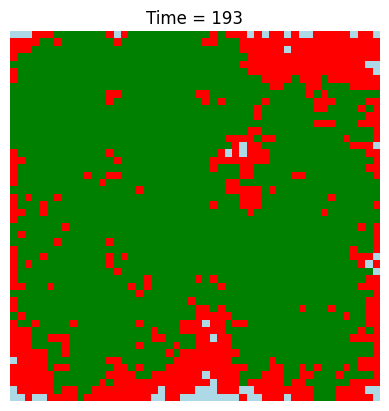

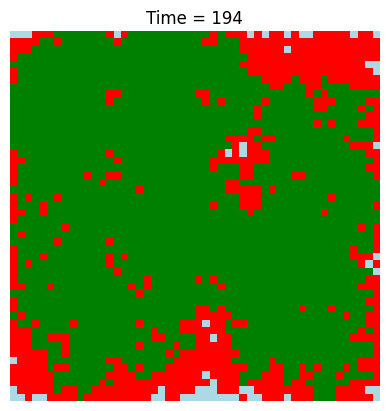

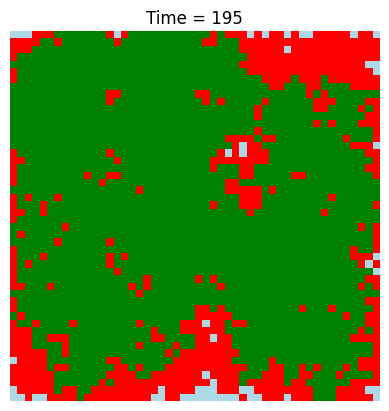

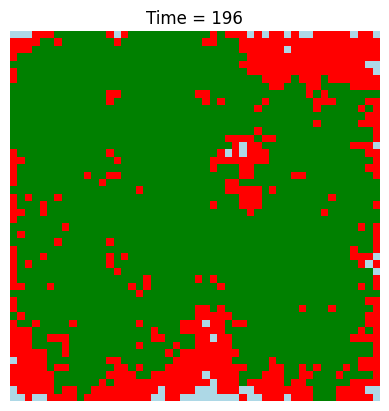

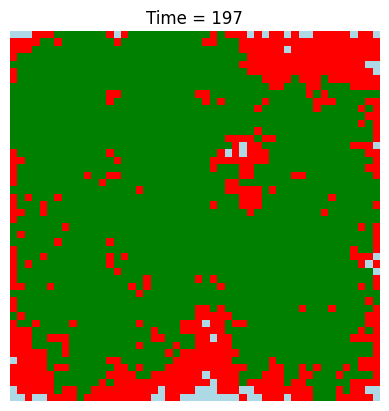

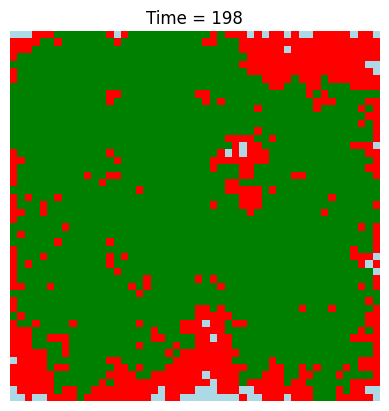

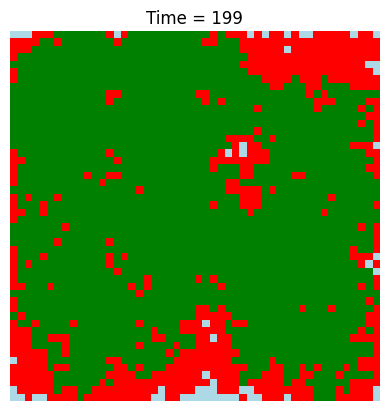

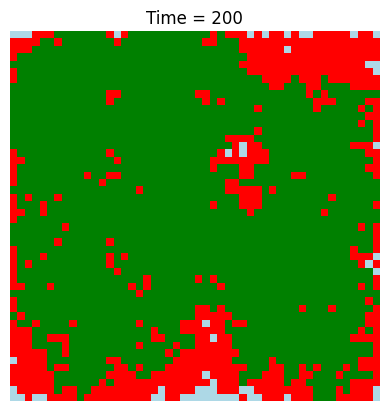

In [ ]:
for t in range(T + 1):
    plt.imshow(grids_average[t], cmap=ListedColormap(['lightblue', 'red', 'green']), interpolation='nearest', vmin=0, vmax=2)
    plt.title(f'Time = {t}')
    plt.axis('off')
    plt.savefig(f'grid_snapshot_{t}.png')
    plt.show()
